In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [94]:
data = pd.read_csv("data.csv")
ncap_data = pd.read_csv("NCAP_Funding.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627461 entries, 0 to 1627460
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1627461 non-null  object 
 1   station    1627461 non-null  object 
 2   PM2.5      728348 non-null   float64
 3   PM10       699014 non-null   float64
 4   address    1387431 non-null  object 
 5   city       1563702 non-null  object 
 6   latitude   1563702 non-null  float64
 7   longitude  1563702 non-null  float64
 8   state      1563702 non-null  object 
dtypes: float64(4), object(5)
memory usage: 111.7+ MB


# SPATIAL AGGREGATION

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [95]:
mean_per_state = data.groupby("state")["PM2.5"].mean()    #grouped data for each state and find the mean of their PM2.5 levels
state_max = mean_per_state.idxmax()
print(f"{state_max} has the highest avg PM2.5 value of {mean_per_state[state_max]} across all years")

Delhi has the highest avg PM2.5 value of 104.1009176780069 across all years


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [96]:
data_2023 = data[(data["Timestamp"] >= "2023") & (data["Timestamp"] < "2024")]    #data for only year 2023
hazardous_level = data_2023[data_2023["PM2.5"] > 300]      #filtered days with hazardous level
hazardous_day_count_by_state = hazardous_level.groupby("state")["PM2.5"].count()    #pandas series of state with their no. of hazardous level days

print(f"State {hazardous_day_count_by_state.idxmax()} had the most days ({hazardous_day_count_by_state.max()}) with hazardous PM2.5 levels in the year 2023")

State Delhi had the most days (470) with hazardous PM2.5 levels in the year 2023


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (variability is measured as standard deviation (sigma))

In [97]:
state_Pm2_std = data_2023.groupby("state")["PM2.5"].std()    #standard deviation of PM2.5 levels for each state
print(f"State {state_Pm2_std.idxmax()} has the highest variability of {state_Pm2_std.max()} in PM2.5 levels across its monitoring stations in 2023")

State Delhi has the highest variability of 82.79710576209911 in PM2.5 levels across its monitoring stations in 2023


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)

In [98]:
covid_data = data[(data["Timestamp"] >= "2020") & (data["Timestamp"] < "2022")]   #data for covid period i.e. 2020-2021
min_covid_pm2_bystate = covid_data.groupby("state")["PM2.5"].min()      #min PM2.5 levels for each state
print(f"State {min_covid_pm2_bystate.idxmin()} has the lowest average PM2.5 levels of {min_covid_pm2_bystate.min()} during the Covid period (The year 2020-2021 both years inclusive)")

State Madhya Pradesh has the lowest average PM2.5 levels of 0.0279545454545454 during the Covid period (The year 2020-2021 both years inclusive)


# Temporal Aggregation

In [99]:
#Load dataset
df = pd.read_csv("Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors = "coerce")

1.Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [100]:
df_aug_2020 = df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]
highest_pm25_station = df_aug_2020.loc[df_aug_2020["PM2.5"].idxmax(), ["station", "PM2.5"]]
print(f"Station {highest_pm25_station['station']} had the highest PM2.5 value of {highest_pm25_station['PM2.5']} in August 2020")

Station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB had the highest PM2.5 value of 805.51 in August 2020


2.For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.


In [101]:
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2018 = df[(df["Timestamp"].dt.year == 2018) & (df["station"] == station_name)]

seasons = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9]}
df_2018 = df[(df["Timestamp"].dt.year == 2018) & (df["station"] == station_name)].copy()

df_2018.loc[:, "PM2.5"] = df_2018["PM2.5"].fillna(df_2018["PM2.5"].mean())

seasons = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9]}
seasonal_avg = {season: df_2018[df_2018["Timestamp"].dt.month.isin(months)]["PM2.5"].mean() for season, months in seasons.items()}
print("Seasonal PM2.5 averages:", seasonal_avg)
print("Most Polluted Season:", max(seasonal_avg, key=seasonal_avg.get))

Seasonal PM2.5 averages: {'Winter': 57.65036608939018, 'Summer': 52.729376952361385, 'Monsoon': 48.5284174154991}
Most Polluted Season: Winter


(Thought Ques.) Can you suggest some potential factors on why certain seasons are generally more polluted than others?

The following are some potential factors inflencing seasonal variations in pollution levels:
Higher pollution is observed during winter season. Cold air traps pollutants close to the ground, preventing dispersion. More burning of wood, coal, and crop residue for heating also contributes to air pollution. Some other reasons include less air movement. Moisture in the air helps pollutants form thick smog in winter.
During summers, winds are stronger and temperatures higher which helps in dispersing pollutants. While in monsoon, frequent rainfall washes pollutants out of the air. Higher humidity in this season helps in settling dust and particulates. Flooding and water logging effectively reduces pollution sources like vehicular emission. 

3.Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

Calculate the monthly average PM2.5 for weekdays and weekends separately

X-axis: Months (January to December).

Y-axis: Average PM2.5 levels.

Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


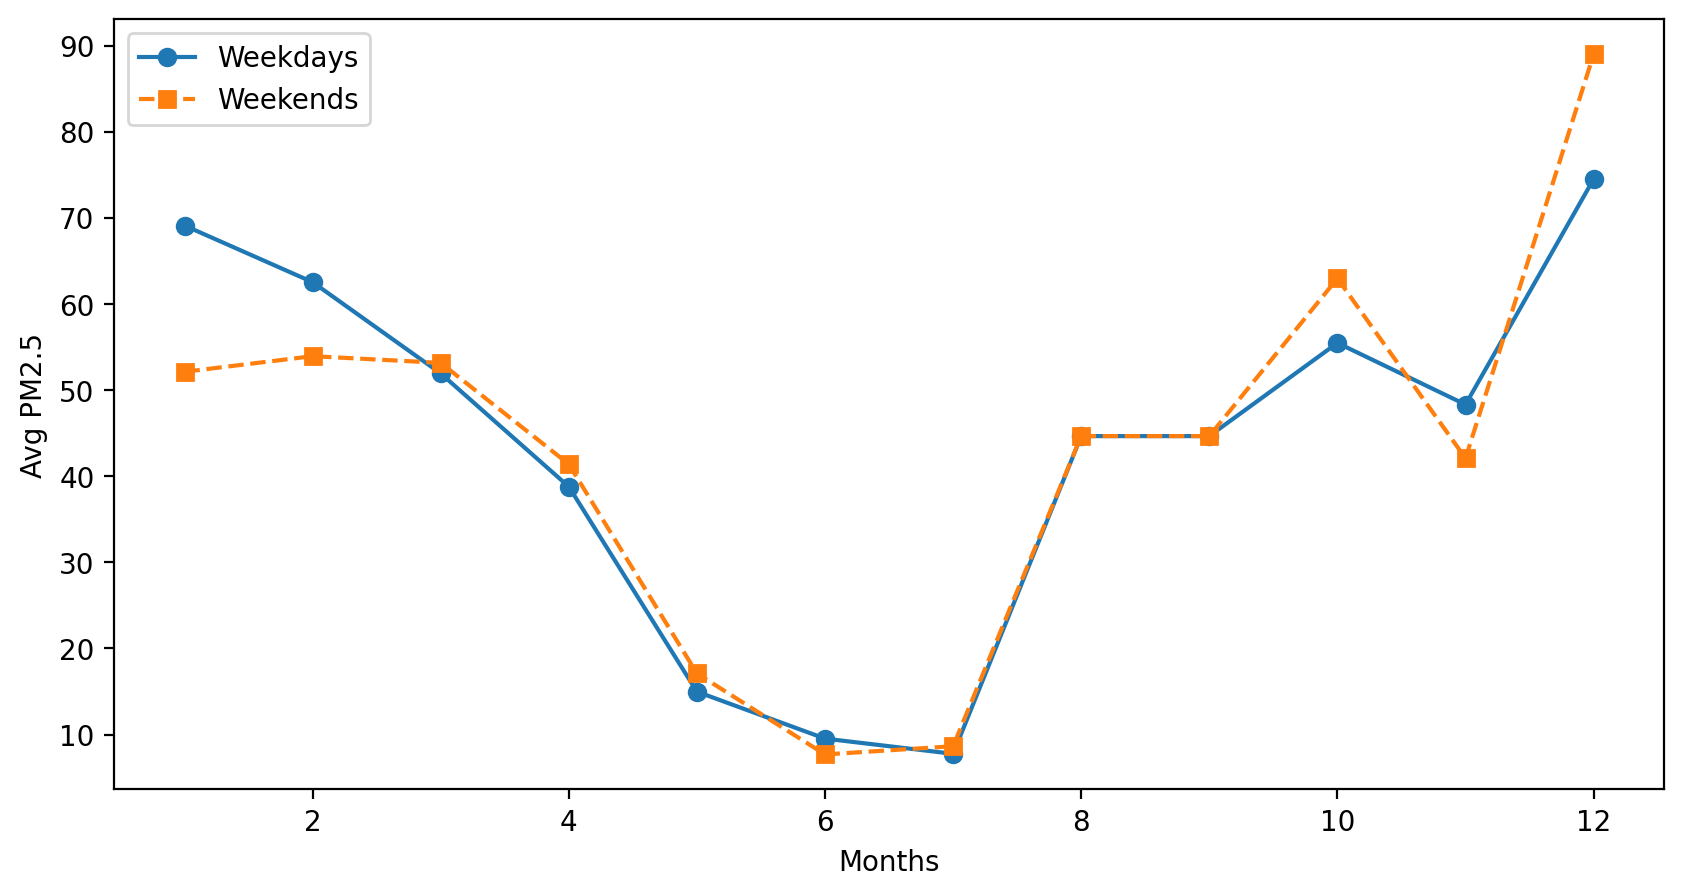

In [102]:
#Q 3. Weekdays vs Weekends PM2.5 (2021)
df_2021 = df[(df["Timestamp"].dt.year == 2021) & (df["station"] == station_name)].copy()
df_2021["DayOfWeek"] = df_2021["Timestamp"].dt.dayofweek
df_2021["Weekend"] = df_2021["DayOfWeek"] >= 5
df_2021["Month"] = df_2021["Timestamp"].dt.month

#filling the Nan values of month august and september with median values

median_weekdays = df_2021[df_2021["Weekend"] == False]["PM2.5"].median()
median_weekends = df_2021[df_2021["Weekend"] == True]["PM2.5"].median()

df_2021.loc[(df_2021["Month"] == 8) & (df_2021["PM2.5"].isna()), "PM2.5"] = median_weekdays
df_2021.loc[(df_2021["Month"] == 8) & (df_2021["PM2.5"].isna()), "PM2.5"] = median_weekends

df_2021.loc[(df_2021["Month"] == 9) & (df_2021["PM2.5"].isna()), "PM2.5"] = median_weekdays
df_2021.loc[(df_2021["Month"] == 9) & (df_2021["PM2.5"].isna()), "PM2.5"] = median_weekends

#finding the avg values and plotting the figure
weekday_avg = df_2021[df_2021["Weekend"] == False].groupby("Month")["PM2.5"].mean()
weekend_avg = df_2021[df_2021["Weekend"] == True].groupby("Month")["PM2.5"].mean()

plt.figure(figsize=(10, 5))
plt.plot(weekday_avg.index, weekday_avg.values, label="Weekdays", marker="o")
plt.plot(weekend_avg.index, weekend_avg.values, label="Weekends", marker="s", linestyle="--")
plt.xlabel("Months")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

# Spatio-temporal aggregation

1.For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [ ]:
#State-wise % change in PM2.5 (Summer vs Monsoon 2022)
df_2022 = df[df["Timestamp"].dt.year == 2022]
summer_avg = df_2022[df_2022["Timestamp"].dt.month.isin(seasons["Summer"])].groupby("state")["PM2.5"].mean()
monsoon_avg = df_2022[df_2022["Timestamp"].dt.month.isin(seasons["Monsoon"])].groupby("state")["PM2.5"].mean()
percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100

print("Percentage Change in PM2.5:")
print(percentage_change,"\n")              #negative sign indicates decrease in PM2.5 levels

most_diff_state = percentage_change.abs().idxmax()
print(f"State {most_diff_state} had the highest change in PM2.5 levels between Summer and Monsoon 2022 with {percentage_change[most_diff_state]:.2f}%")


Percentage Change in PM2.5:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         -53.496777
Name:

2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023.

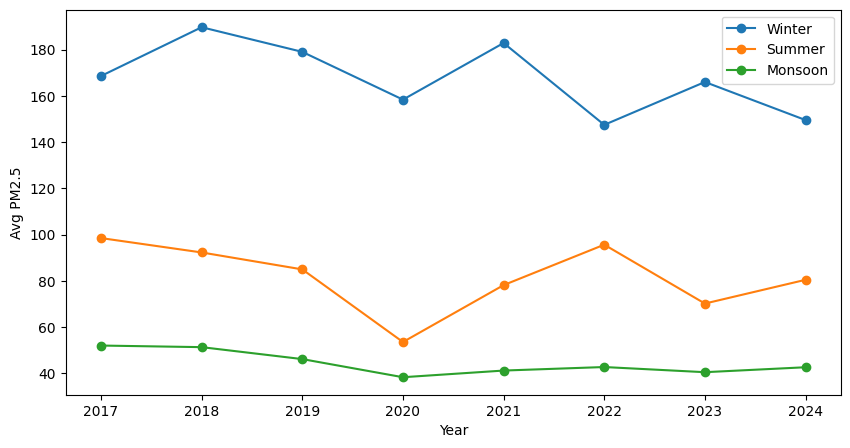

In [ ]:
#Seasonal PM2.5 Trends in Delhi (2017-2023)
df_delhi = df[df["city"] == "Delhi"].copy()
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
seasonal_trends = {season: df_delhi[df_delhi["Timestamp"].dt.month.isin(months)].groupby("Year")["PM2.5"].mean() for season, months in seasons.items()}

plt.figure(figsize=(10, 5))
for season, trend in seasonal_trends.items():
    plt.plot(trend.index, trend.values, label=season, marker="o")
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

What seasonal variation, if any, can you observe in pollution levels?


From the analysis in pollution levels, it is evident that winter shows the highest pollution levels. The winter season consistently has the highest average PM2.5 values. This could be due to temperature inversion, where cold air traps pollutants near the ground, preventing dispersion. Monsoon season shows lowest pollution levels. The reason of decrease in pollution levels is due to rainfall washing away pollutants and improved air circulation. The level of pollution in summer is higher than monsoon but lower than winter. Increased dust and emissions contribute to moderate pollution, but higher temperatures allow better dispersion.

3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


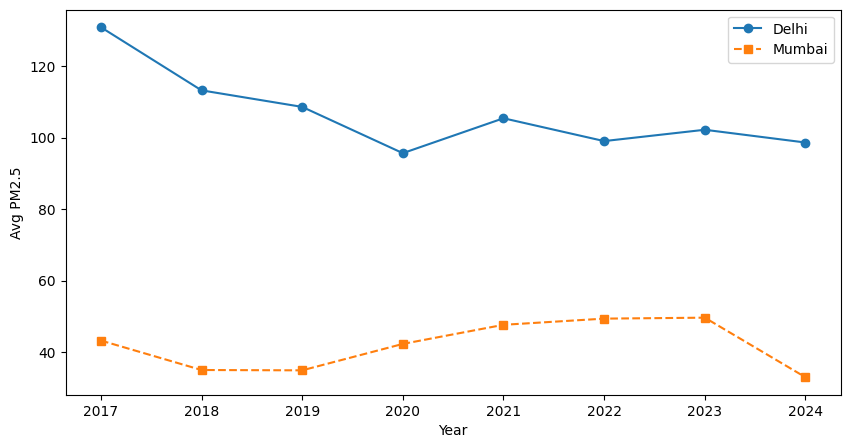

Fluctuation Levels: city
Delhi     0.074921
Mumbai    0.129768
dtype: float64


In [ ]:
#Delhi vs Mumbai PM2.5 (2015-2023)
df_cities = df[df["city"].isin(["Delhi", "Mumbai"])].copy()
df_cities["Year"] = df_cities["Timestamp"].dt.year
city_avg = df_cities.groupby(["Year", "city"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(city_avg.index, city_avg["Delhi"], label="Delhi", marker="o")
plt.plot(city_avg.index, city_avg["Mumbai"], label="Mumbai", marker="s", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

delhi_mumbai_fluctuations = city_avg.pct_change().abs().mean()
print("Fluctuation Levels:", delhi_mumbai_fluctuations)

The fluctuation level of Mumbai is more. Therefore, Mumbai city had more fluctuations over the years.

# Population-Based

1. Which state in India has the highest number of monitoring stations relative to its population? 


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
state_data.rename({'State':'state'}, axis=1, inplace=True)
ncap_data = pd.read_csv('NCAP_Funding.csv')



# Count unique monitoring stations per state
stations_by_state = data.groupby('state', as_index=False)['station'].nunique()

# Merge with state_data to get population data
merged_data = state_data.merge(stations_by_state, left_on='state', right_on='state', how='left')

# Calculate stations per capita (per population)
merged_data['Stations_per_capita'] = merged_data['station'] / merged_data['Population']

# Find the state with the highest number of stations per capita
highest_station_state = merged_data.loc[merged_data['Stations_per_capita'].idxmax()]
print(f"State with highest number of monitoring stations relative to its population: {highest_station_state['state']} with {highest_station_state['Stations_per_capita']:.8f} stations per capita")


State with highest number of monitoring stations relative to its population: Chandigarh with 0.00000284 stations per capita


2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

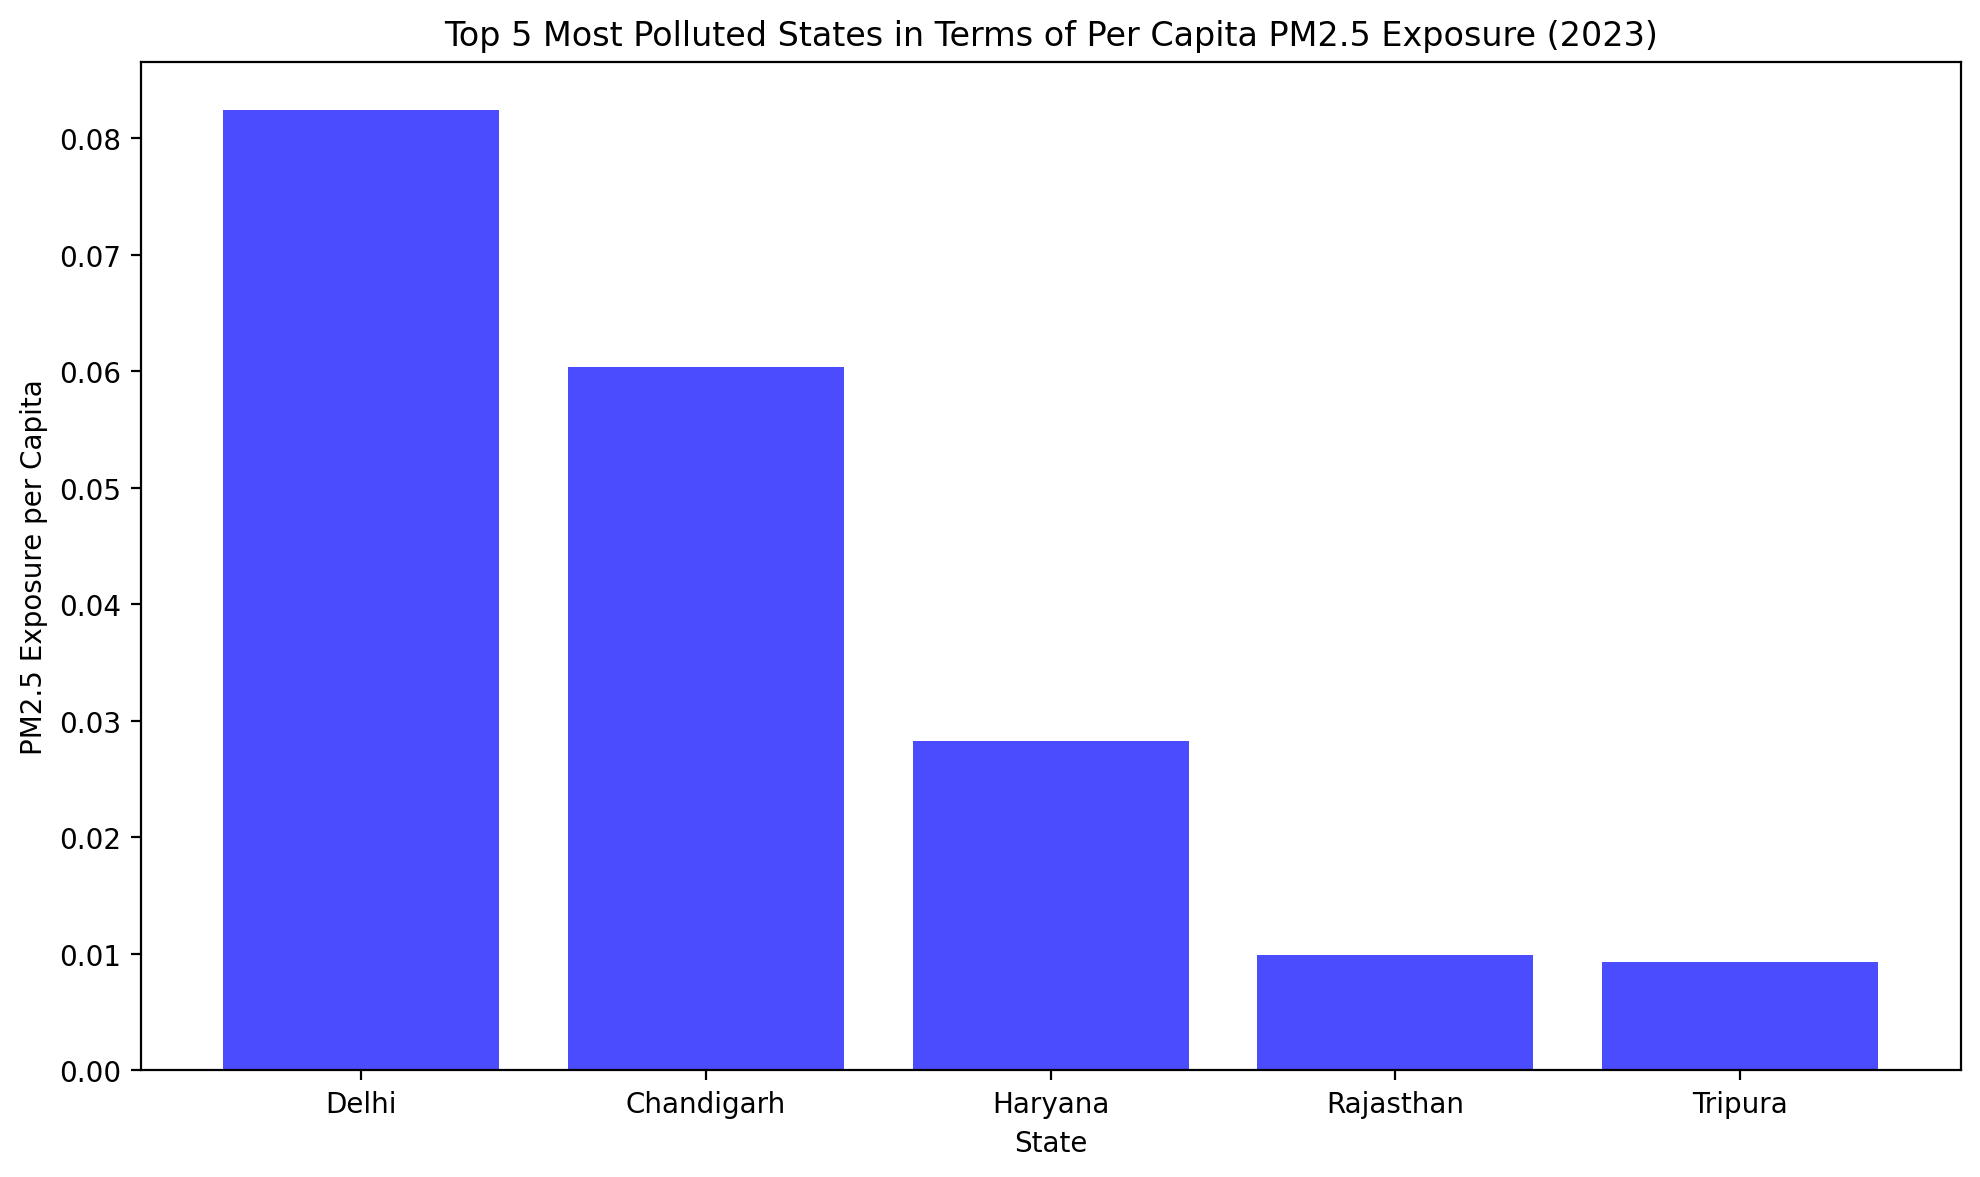

In [104]:
# Ensure correct datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter for 2023 data only
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Calculate total PM2.5 exposure for each state in 2023
total_pm25_2023 = data_2023.groupby('state', as_index=False)['PM2.5'].sum()

# Merge with state_data to get population data
merged_2023 = state_data.merge(total_pm25_2023, left_on='state', right_on='state', how='left')

# Calculate per capita PM2.5 exposure
merged_2023['PM2.5_per_capita'] = merged_2023['PM2.5'] / merged_2023['Population']

# Sort states by PM2.5 per capita and get the top 5 most polluted states
top_5_polluted_states = merged_2023.sort_values(by='PM2.5_per_capita', ascending=False).head(5)

# Plot a bar chart for the top 5 most polluted states with hue
plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted_states['state'], top_5_polluted_states['PM2.5_per_capita'], color='blue', alpha=0.7)
plt.xlabel('State')
plt.ylabel('PM2.5 Exposure per Capita')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure (2023)')
plt.tight_layout()  
plt.show()


3. Plot the relationship between population density and average PM2.5 concentration for each state. 

X-axis: Population density (people per square kilometer).

Y-axis: Average PM2.5 concentration.

Use a scatter plot to show the relationship, where each point represents a state.


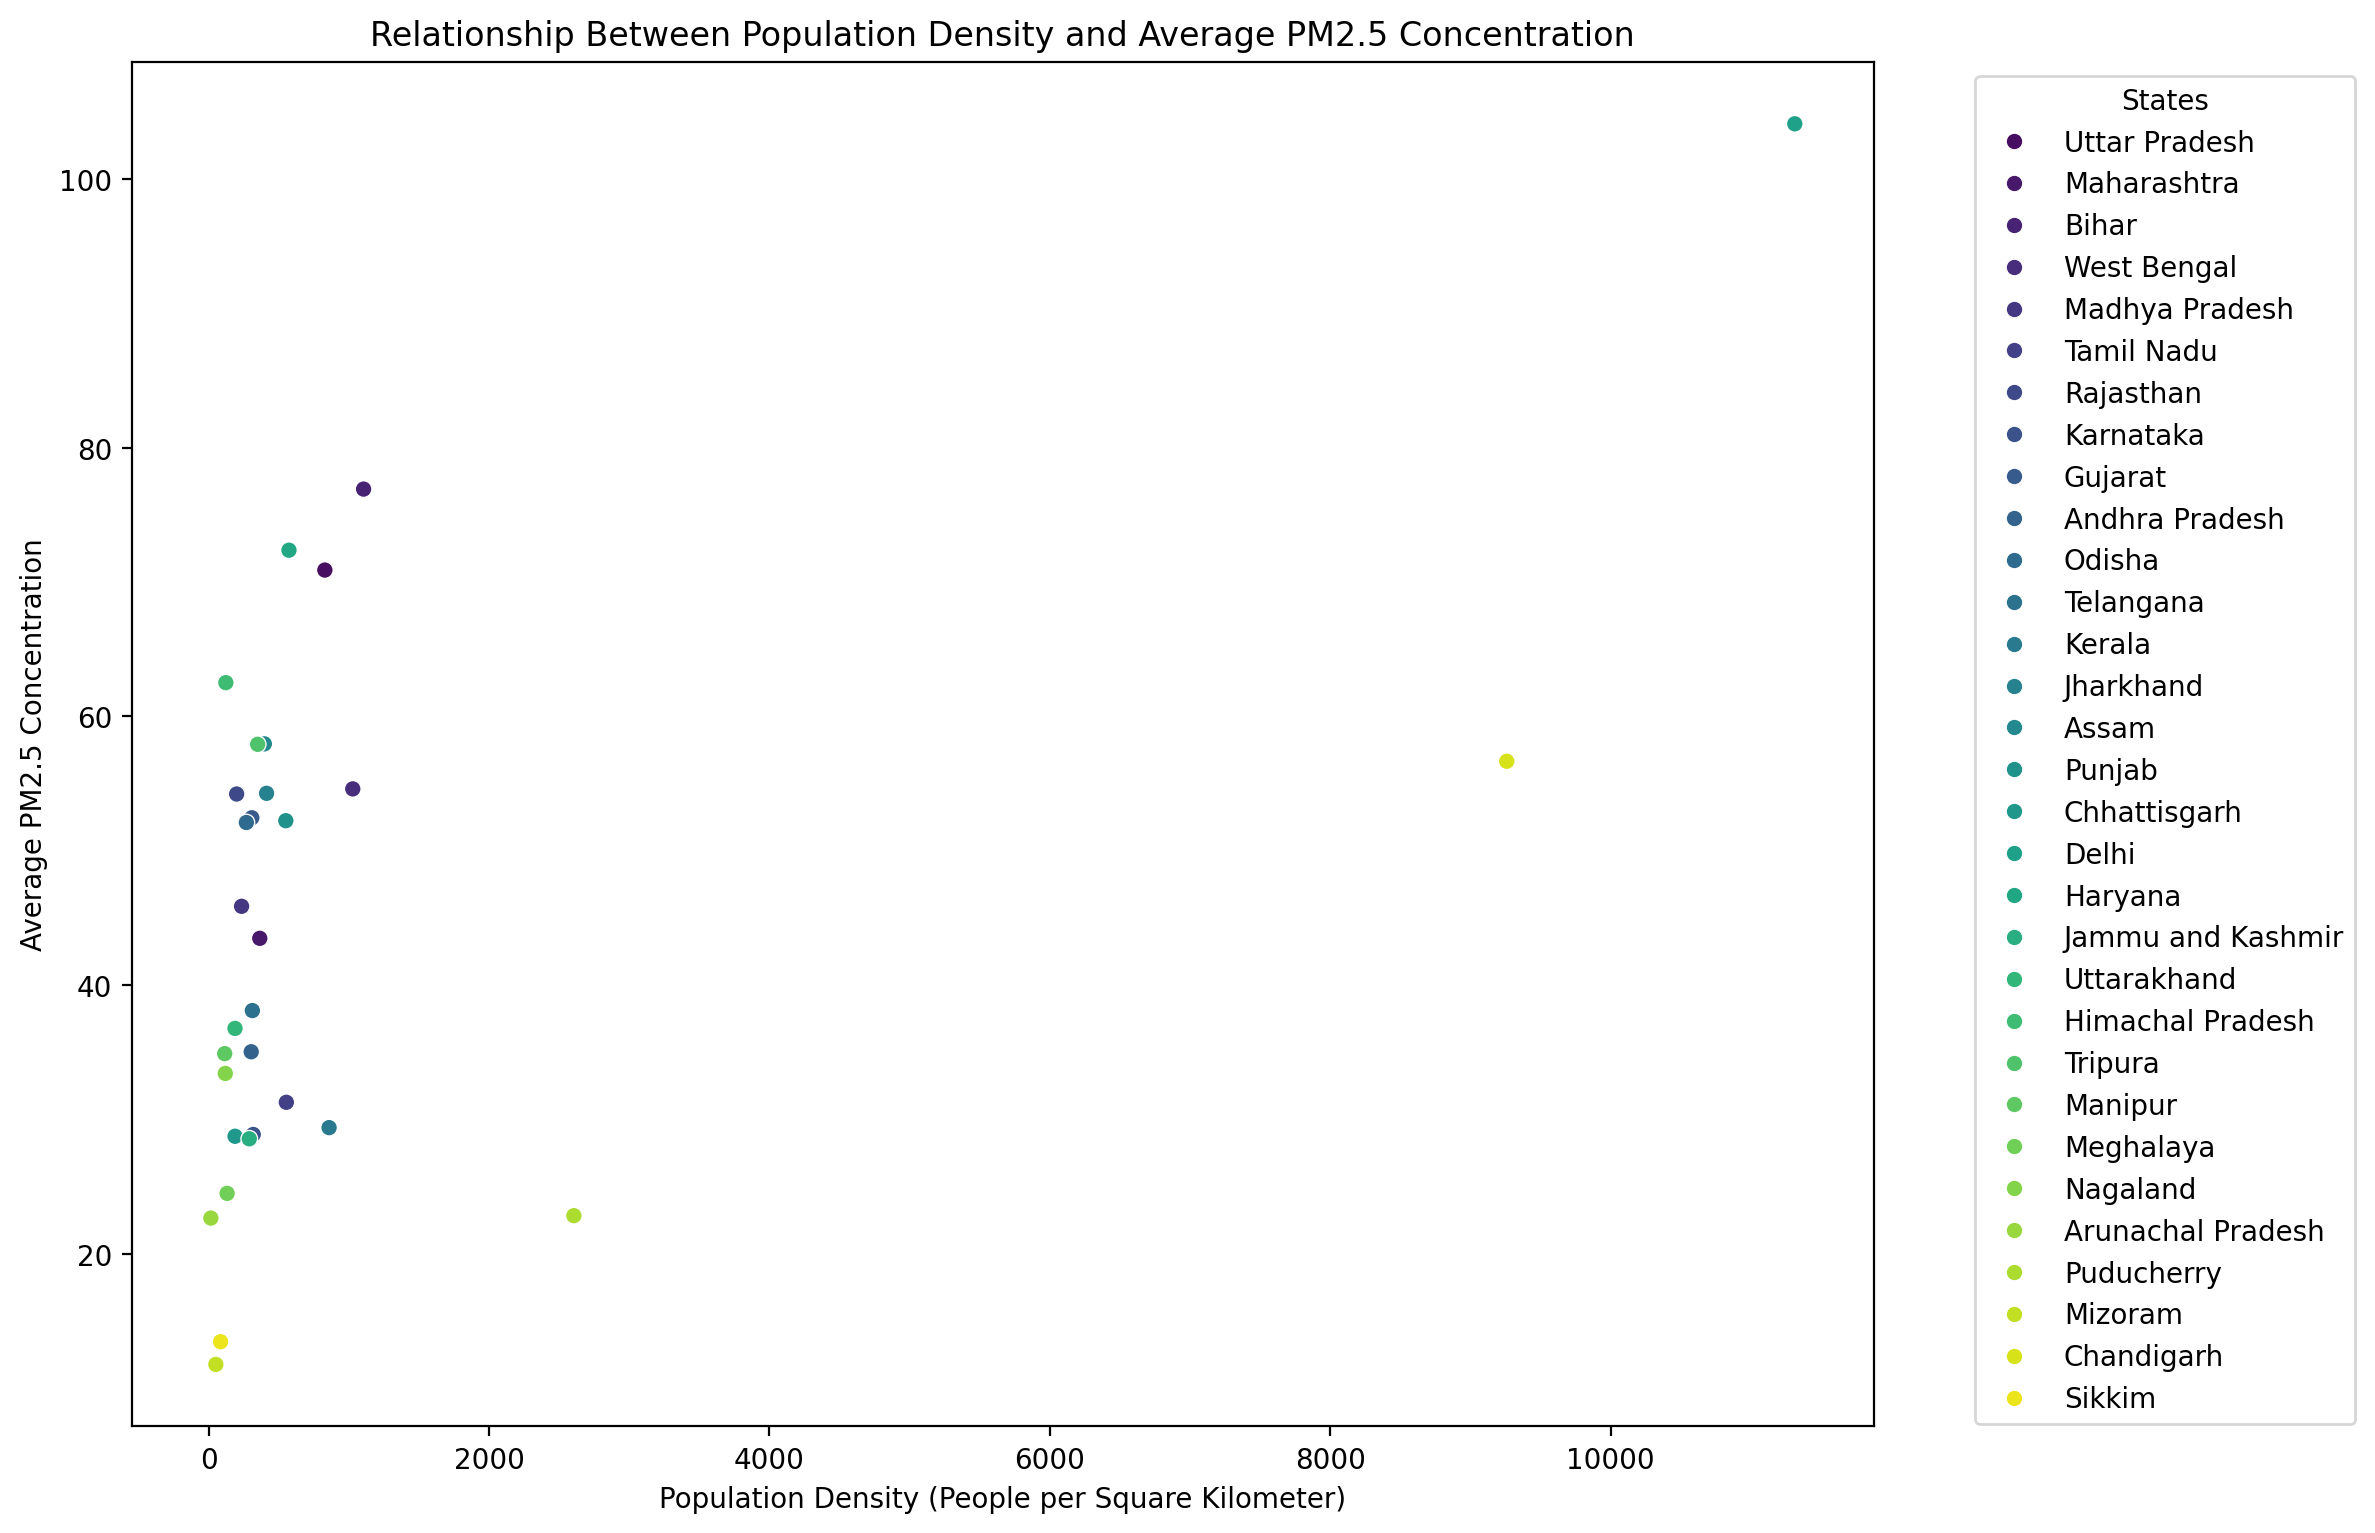

Correlation between Population Density and Average PM2.5 Concentration: 0.51


In [105]:
# Calculate average PM2.5 concentration for each state
avg_pm25_state = data.groupby('state', as_index=False)['PM2.5'].mean()

# Merge with state_data to get population density for each state
state_density_data = state_data.merge(avg_pm25_state, left_on='state', right_on='state', how='left')
state_density_data['Population_density'] = state_density_data['Population'] / state_density_data['Area (km2)']

# Scatter plot to show the relationship between population density and average PM2.5 concentration
plt.figure(figsize=(12, 8))
sns.scatterplot(data=state_density_data, x='Population_density', y='PM2.5', hue='state', palette='viridis')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add titles and labels
plt.title('Relationship Between Population Density and Average PM2.5 Concentration')
plt.xlabel('Population Density (People per Square Kilometer)')
plt.ylabel('Average PM2.5 Concentration')
plt.tight_layout()

# Show the plot
plt.show()

# Calculate the correlation between Population Density and Average PM2.5 Concentration
correlation = state_density_data['Population_density'].corr(state_density_data['PM2.5'])

# Print the correlation value
print(f'Correlation between Population Density and Average PM2.5 Concentration: {correlation:.2f}')

Q. What conclusion can you draw about the correlation between population density and pollution?

If the correlation is positive (e.g., above 0.5), we can conclude that:

As population density increases, average PM2.5 concentration tends to increase. This may indicate that states with higher population densities (often urban areas) have more pollution, likely due to factors such as higher traffic, industrial activities, and energy consumption.

If the correlation is weak or negative (e.g., close to 0 or below 0), we can conclude that:

Population density does not strongly influence the average PM2.5 concentration. Other factors, such as environmental regulations, transportation policies, or the presence of green spaces, might play a more significant role in determining pollution levels.


# Area-Based

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

X-axis: States.

Y-axis: PM2.5 concentration per square kilometer.

Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


State with highest PM2.5 concentration per square km: Chandigarh with 0.50 PM2.5/sq km


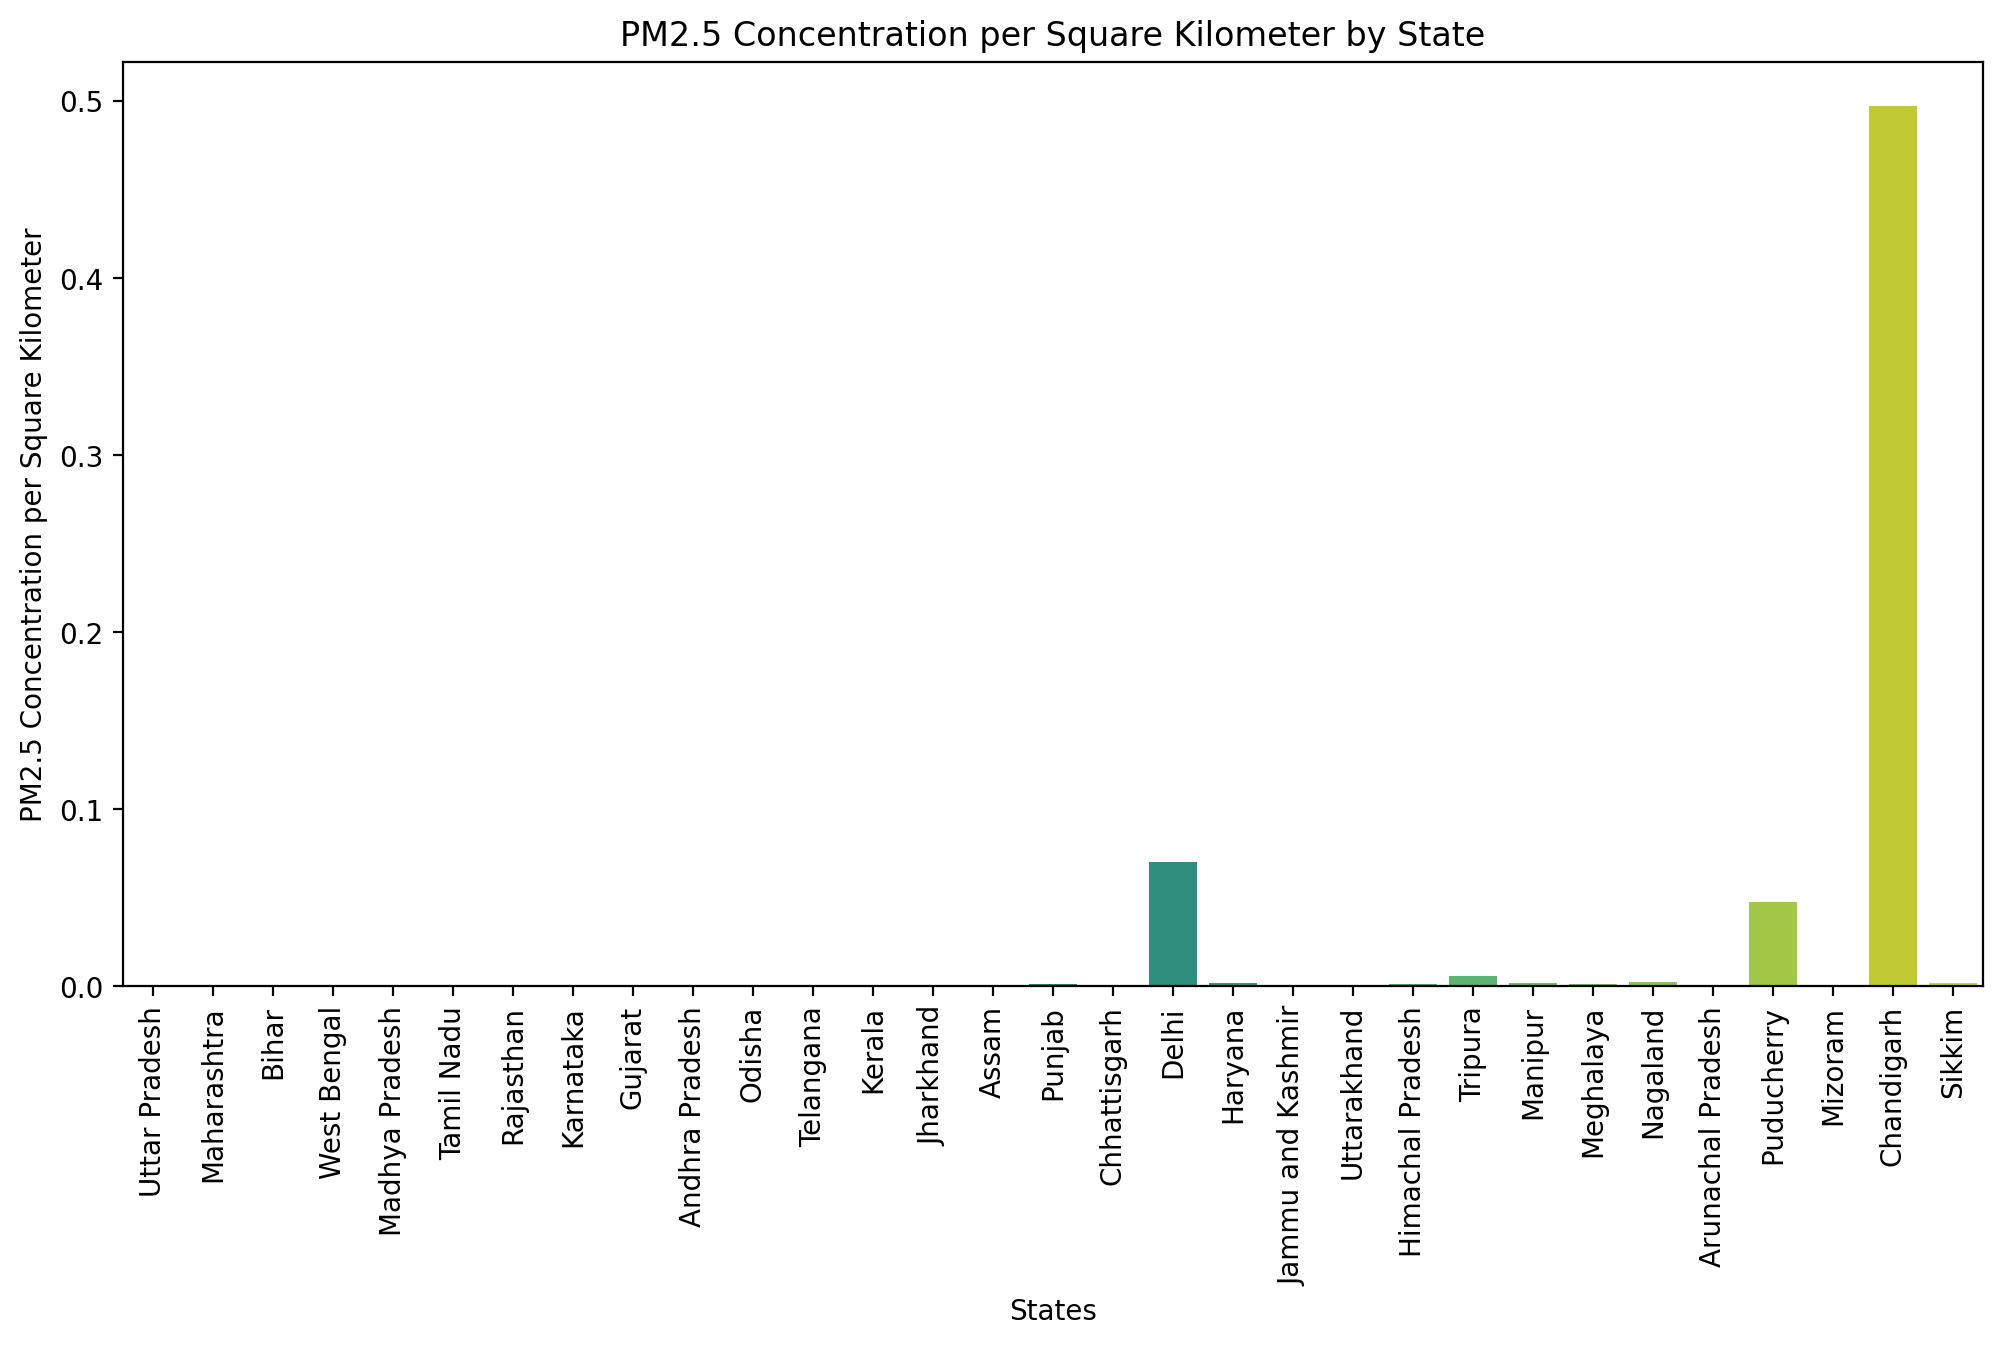

In [106]:
# Ensure column names match
state_data.rename(columns={'State': 'state'}, inplace=True)

pm25_avg = data.groupby('state', as_index=False)['PM2.5'].mean()
pm25_avg.rename(columns={'PM2.5': 'Avg_PM2.5'}, inplace=True)

stations_count = data.groupby('state', as_index=False)['station'].nunique()
stations_count.rename(columns={'station': 'Monitoring_Stations'}, inplace=True)
merged_data = state_data.merge(pm25_avg, on='state', how='left')
merged_data = merged_data.merge(stations_count, on='state', how='left')

# Compute PM2.5 per square kilometer
merged_data['PM2.5_per_sq_km'] = merged_data['Avg_PM2.5'] / merged_data['Area (km2)']
# Find the state with the highest PM2.5 per square kilometer
highest_pm_state = merged_data.loc[merged_data['PM2.5_per_sq_km'].idxmax()]
print(f"State with highest PM2.5 concentration per square km: {highest_pm_state['state']} with {highest_pm_state['PM2.5_per_sq_km']:.2f} PM2.5/sq km")


# Fill NaN values with 0
merged_data.fillna(0, inplace=True)

merged_data['PM2.5_per_sq_km'] = merged_data['Avg_PM2.5'] / merged_data['Area (km2)']
merged_data['Stations_per_sq_km'] = merged_data['Monitoring_Stations'] / merged_data['Area (km2)']

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='state', y='PM2.5_per_sq_km', hue='state', dodge=False, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per Square Kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.show()


2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


State with highest monitoring station density: Delhi with 0.026954 stations/sq km


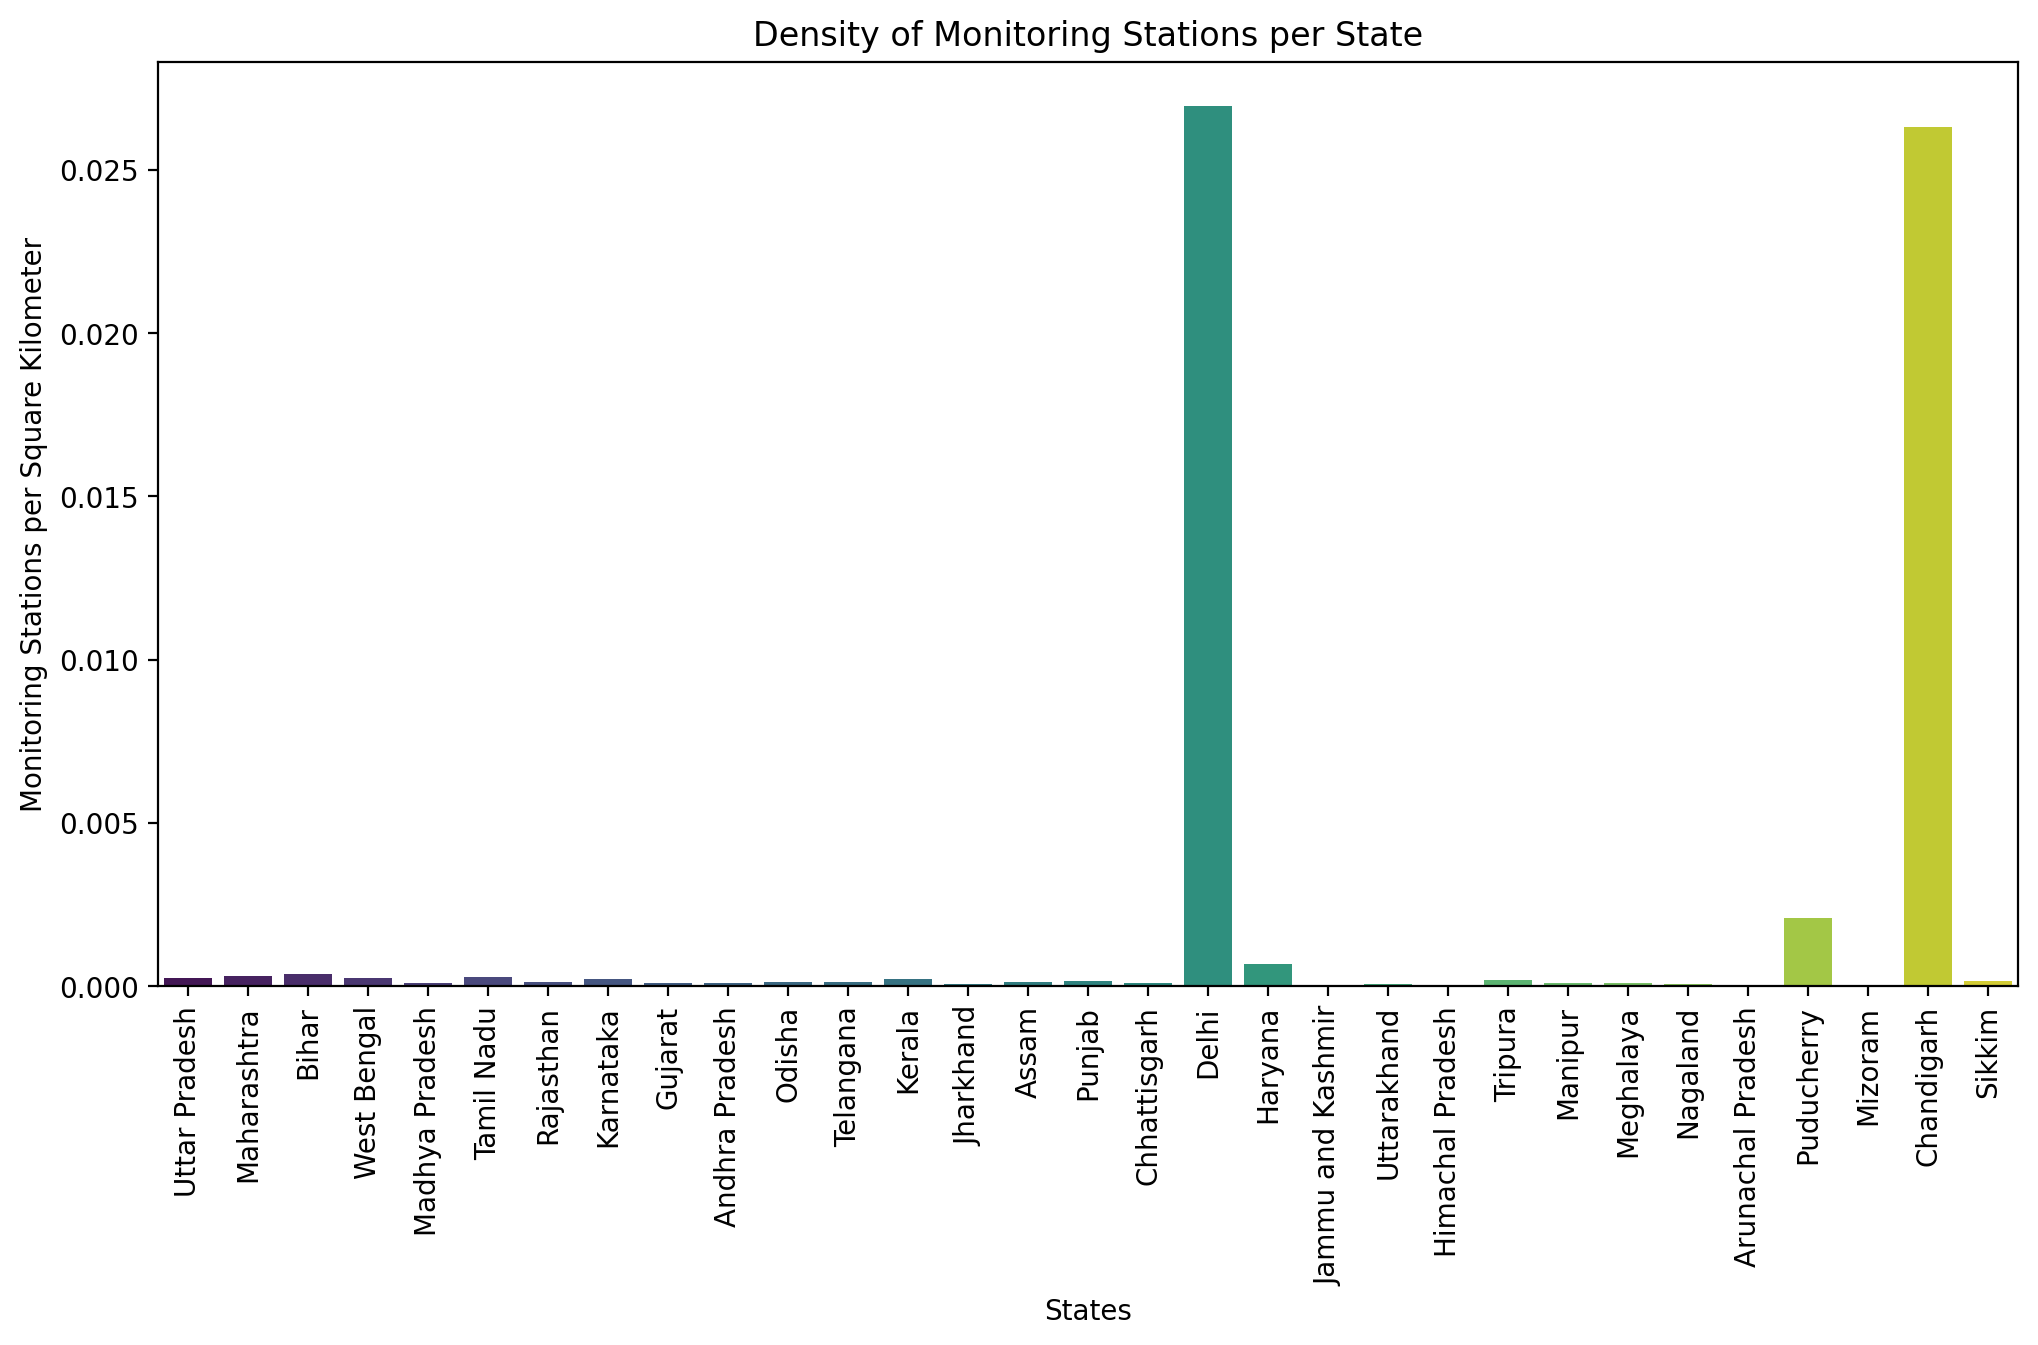

In [107]:
# Find the state with the highest monitoring stations per square kilometer
highest_station_state = merged_data.loc[merged_data['Stations_per_sq_km'].idxmax()]
print(f"State with highest monitoring station density: {highest_station_state['state']} with {highest_station_state['Stations_per_sq_km']:.6f} stations/sq km")

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='state', y='Stations_per_sq_km', hue='state', dodge=False, legend=False, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Monitoring Stations per Square Kilometer')
plt.title('Density of Monitoring Stations per State')
plt.show()


3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.



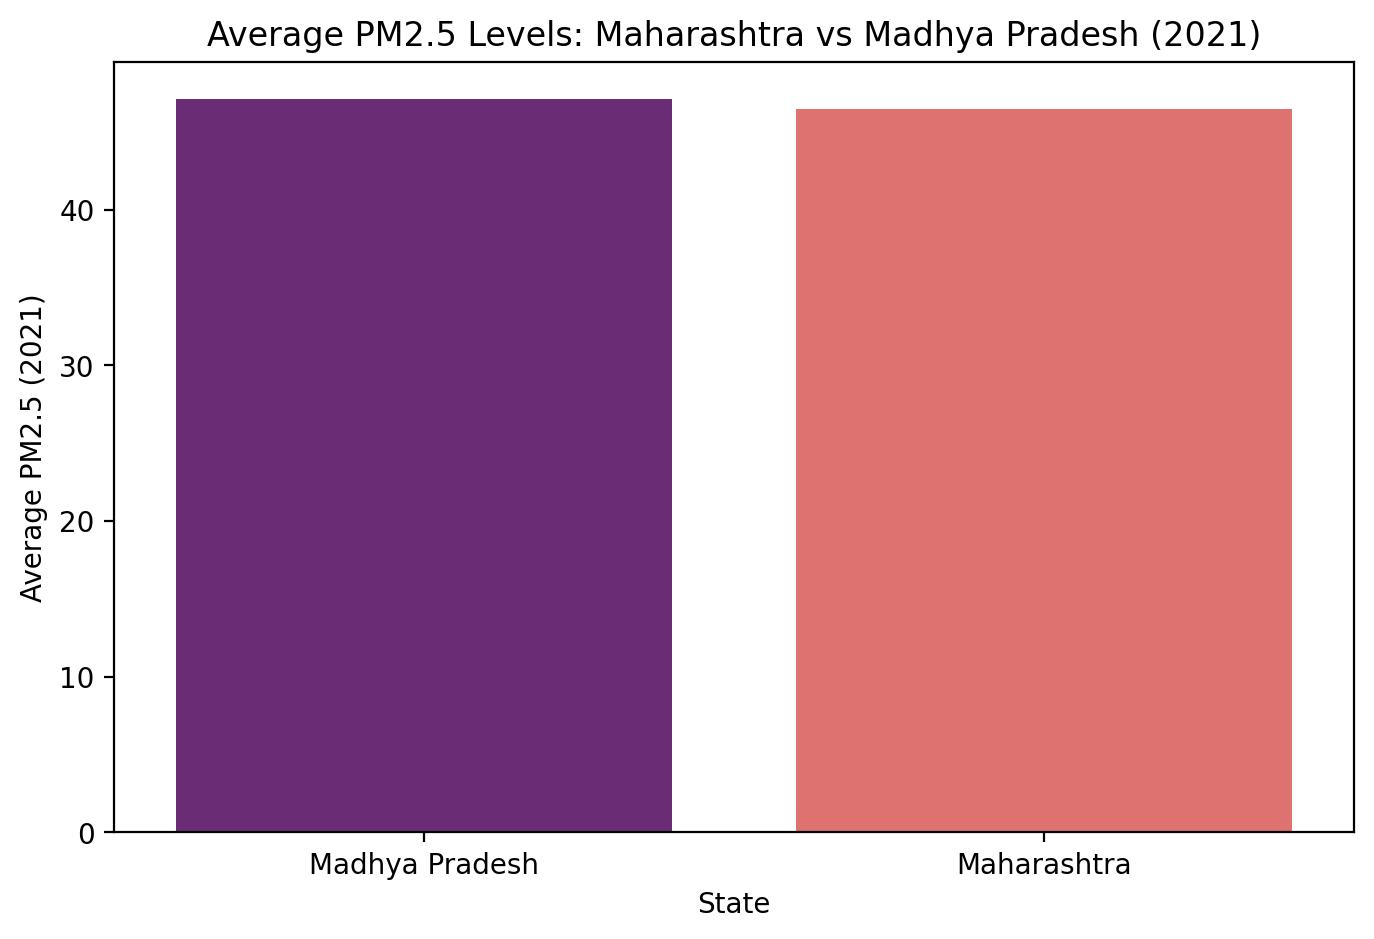

In [108]:
# Ensure correct datetime format for filtering by year
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter for 2021 data only
data_2021 = data[data['Timestamp'].dt.year == 2021]

# Calculate average PM2.5 levels for Maharashtra and Madhya Pradesh in 2021
states_of_interest = ['Maharashtra', 'Madhya Pradesh']
pm25_avg_2021 = data_2021[data_2021['state'].isin(states_of_interest)].groupby('state', as_index=False)['PM2.5'].mean()

# Plot the comparison of average PM2.5 levels for Maharashtra vs Madhya Pradesh
plt.figure(figsize=(8, 5))
sns.barplot(data=pm25_avg_2021, x='state', y='PM2.5', hue='state', dodge=False, legend=False, palette='magma')
plt.xlabel('State')
plt.ylabel('Average PM2.5 (2021)')
plt.title('Average PM2.5 Levels: Maharashtra vs Madhya Pradesh (2021)')
plt.show()


# Funding-Based

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

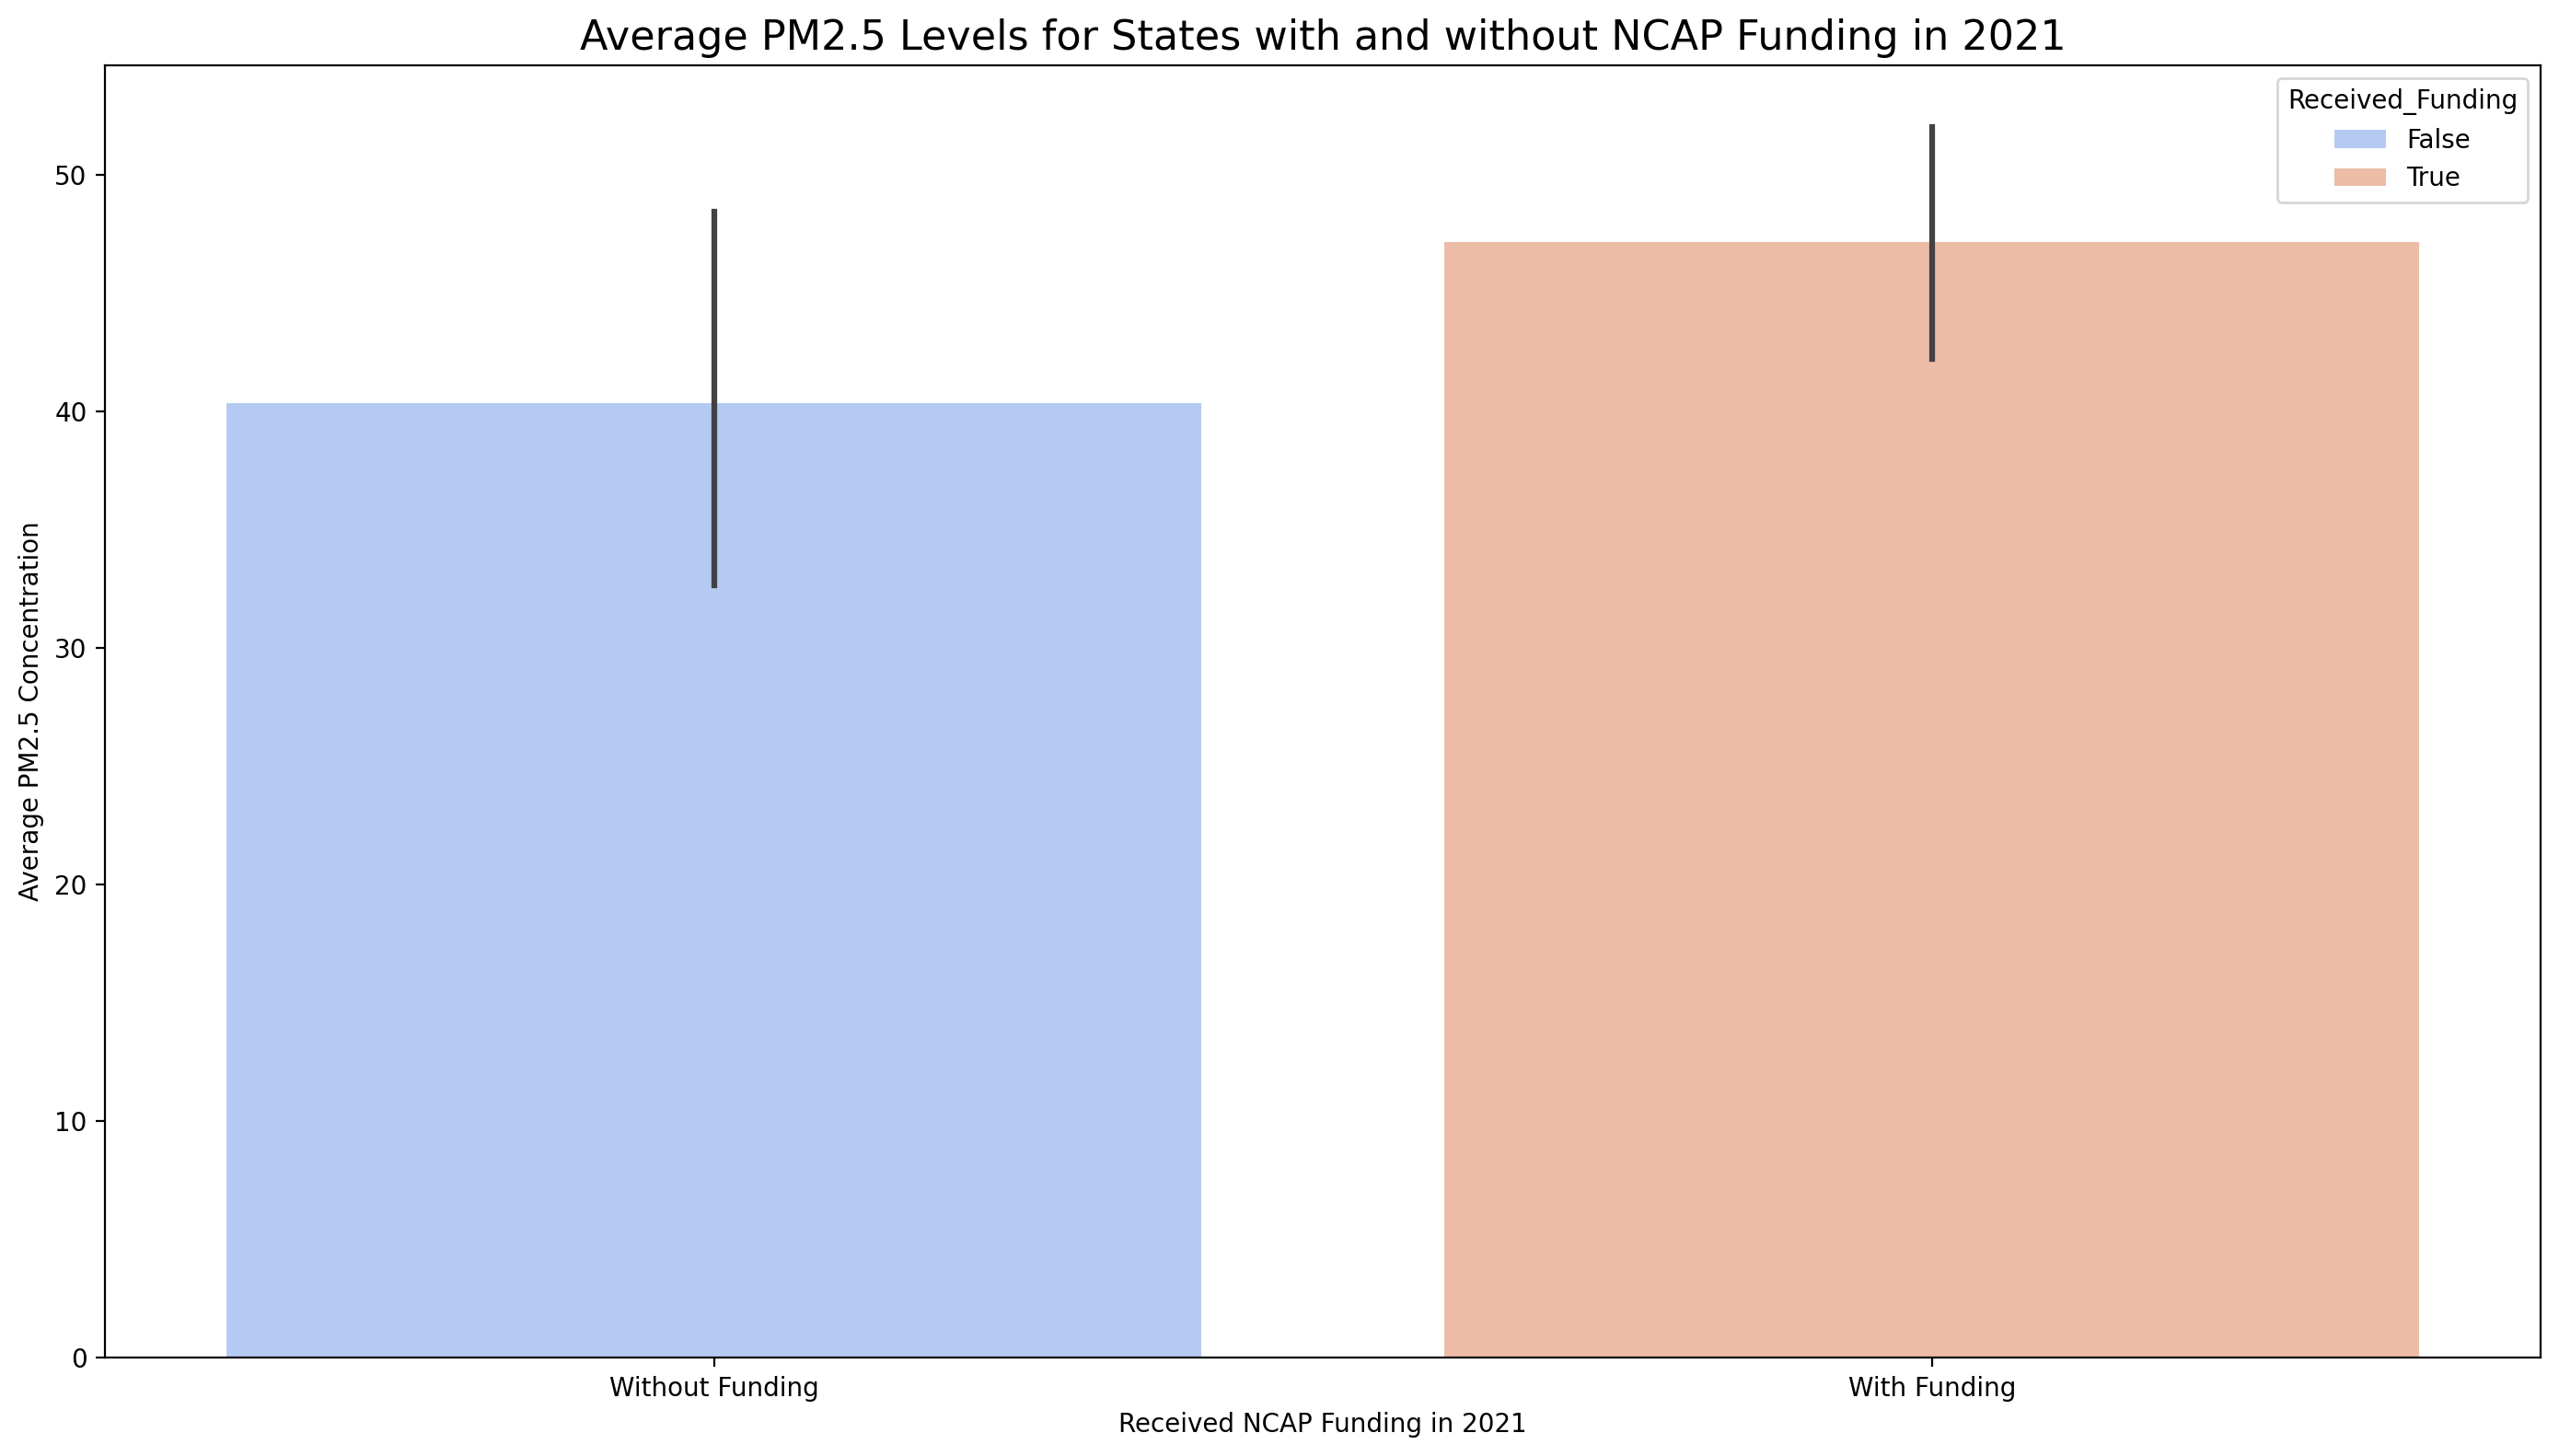

In [109]:
# Strip extra spaces from column names in NCAP funding data
ncap_data.columns = ncap_data.columns.str.strip()

# Convert 'Amount released during FY 2021-22' to numeric, forcing errors to NaN
ncap_data['Amount released during FY 2021-22'] = pd.to_numeric(ncap_data['Amount released during FY 2021-22'], errors='coerce')

# Now merge and analyze the data as before
ncap_funding_2021 = ncap_data[['State', 'Amount released during FY 2021-22']].dropna()

# Merge with PM2.5 data
pm25_funding = data.groupby('state', as_index=False)['PM2.5'].mean()

# Merge the PM2.5 data with state_data
funding_data = state_data.merge(pm25_funding, left_on='state', right_on='state', how='left')

# Merge with NCAP Funding 2021 data
funding_data = funding_data.merge(ncap_funding_2021, left_on='state', right_on='State', how='left')

# Add a column to indicate whether a state received funding in 2021
funding_data['Received_Funding'] = funding_data['Amount released during FY 2021-22'] > 0

# Plot the average PM2.5 levels for states with and without funding
plt.figure(figsize=(14, 8))
sns.barplot(data=funding_data, x='Received_Funding', y='PM2.5', hue='Received_Funding', palette='coolwarm')

# Add titles and labels
plt.title('Average PM2.5 Levels for States with and without NCAP Funding in 2021', fontsize=16)
plt.xlabel('Received NCAP Funding in 2021')
plt.ylabel('Average PM2.5 Concentration')
plt.xticks([0, 1], ['Without Funding', 'With Funding'])
plt.tight_layout()

# Show the plot
plt.show()

2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. 


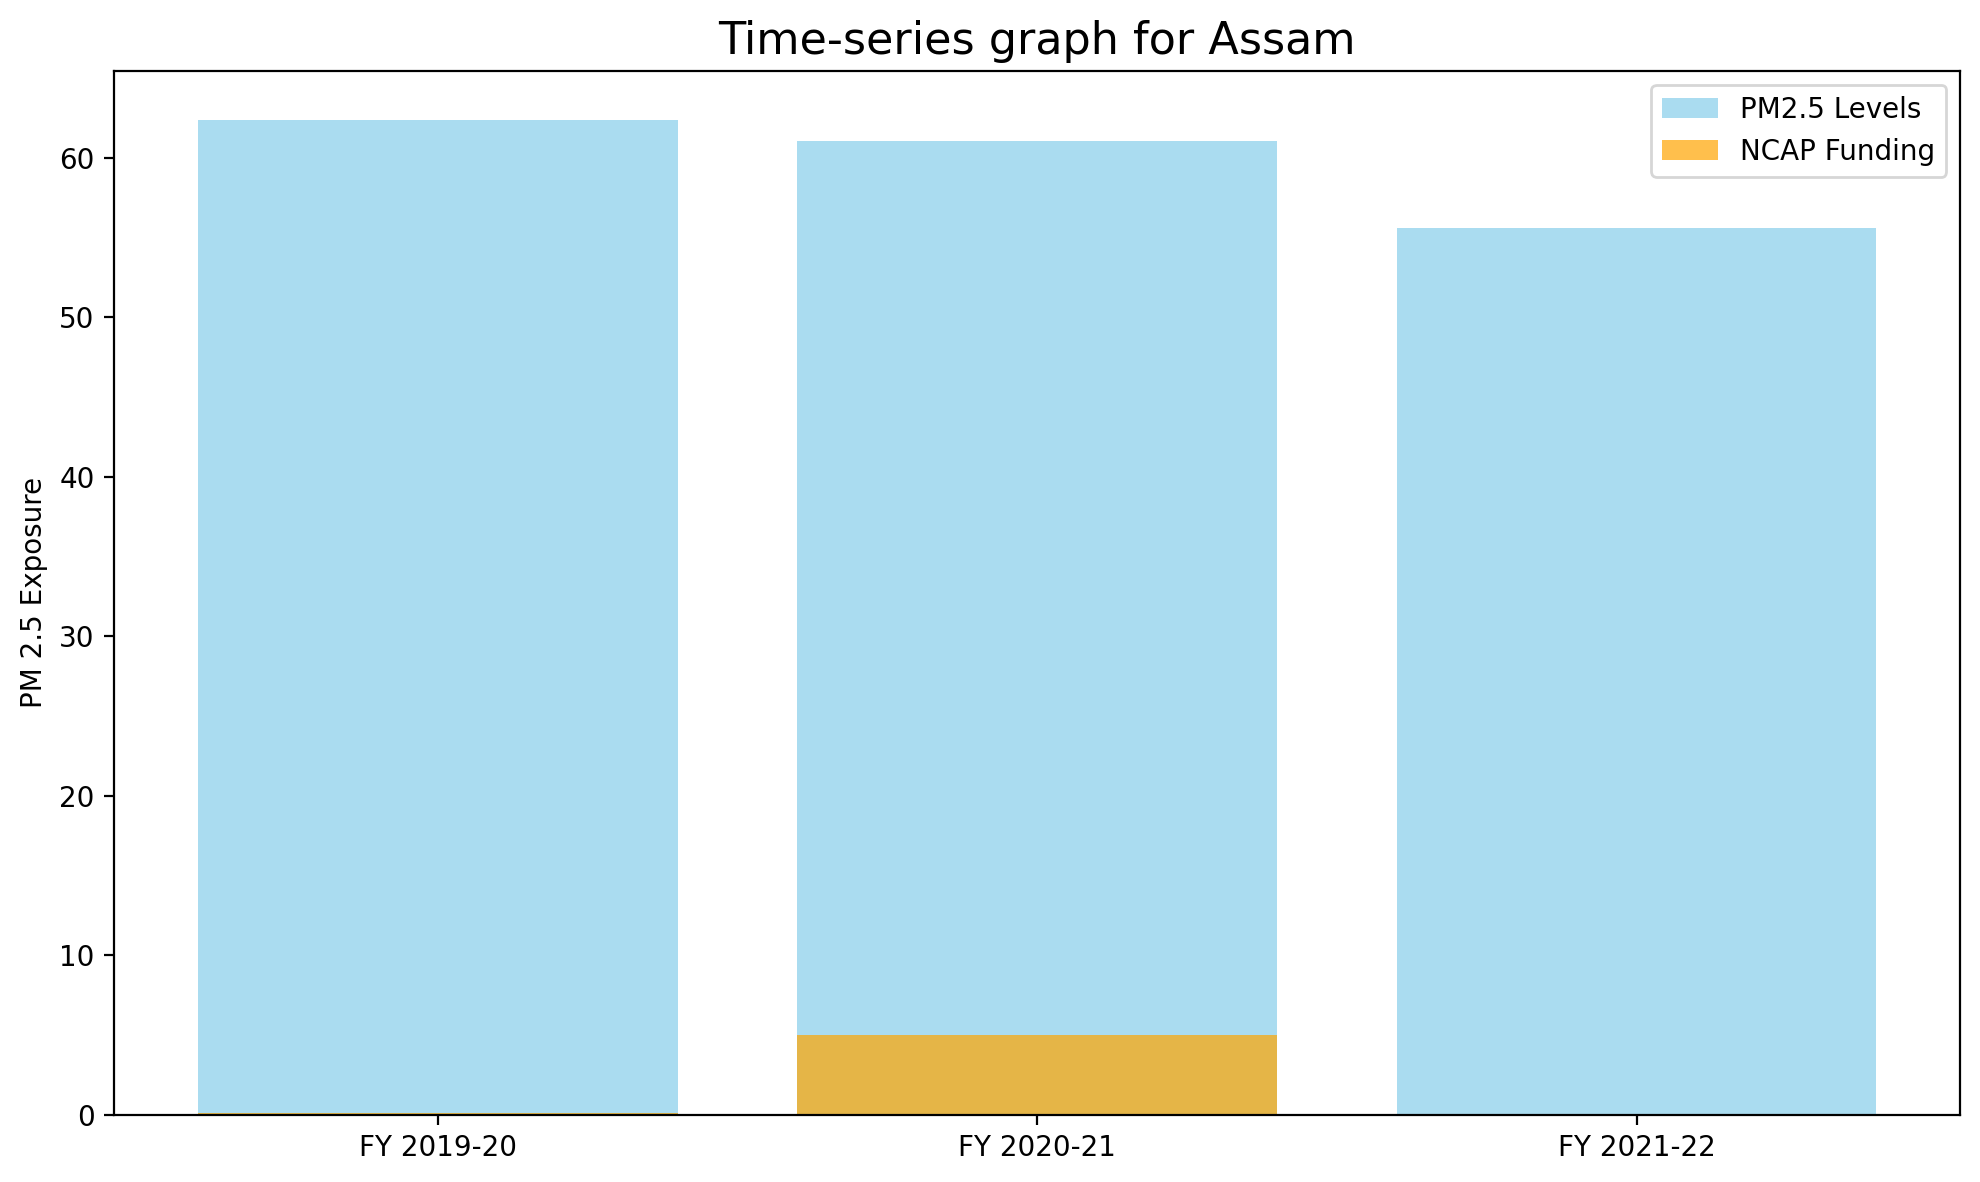

In [110]:
# Strip spaces if any
ncap_data.columns = ncap_data.columns.str.strip()

# Ensure numeric values for funding columns (in case there are any strings or non-numeric values)
ncap_data['Amount released during FY 2019-20'] = pd.to_numeric(ncap_data['Amount released during FY 2019-20'], errors='coerce')
ncap_data['Amount released during FY 2020-21'] = pd.to_numeric(ncap_data['Amount released during FY 2020-21'], errors='coerce')
ncap_data['Amount released during FY 2021-22'] = pd.to_numeric(ncap_data['Amount released during FY 2021-22'], errors='coerce')

#grouping by year and calculating avg Pm2.5 levels in assam
data_2020 = data[(data['Timestamp'].dt.year == 2020)]
data_2021 = data[data['Timestamp'].dt.year == 2021]
data_2022 = data[data['Timestamp'].dt.year == 2022]

pm25_avg_2020 = data_2020[data_2020['state'] == 'Assam']['PM2.5'].mean()    
pm25_avg_2021 = data_2021[data_2021['state'] == 'Assam']['PM2.5'].mean()
pm25_avg_2022 = data_2022[data_2022['state'] == 'Assam']['PM2.5'].mean()


# Plot the bar chart for average PM2.5 levels in Assam for 2020, 2021, and 2022 along with ncap funding in that year
plt.figure(figsize=(10, 6))
plt.bar(['FY 2019-20', 'FY 2020-21', 'FY 2021-22'], [pm25_avg_2020, pm25_avg_2021, pm25_avg_2022], color='skyblue', alpha=0.7, label='PM2.5 Levels')
plt.bar(['FY 2019-20', 'FY 2020-21', 'FY 2021-22'], ncap_data[ncap_data['State'] == 'Assam'][['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']].values[0], color='orange', alpha=0.7, label='NCAP Funding')
# Add titles and labels
plt.title('Time-series graph for Assam', fontsize=16)
plt.ylabel('PM 2.5 Exposure')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()




Q. Has an increment of the financing led to noticeable improvements in air quality?

Increased financing in year 2021 lead to a slight decrease in average PM 2.5 levels in the following year 2022 in Assam

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


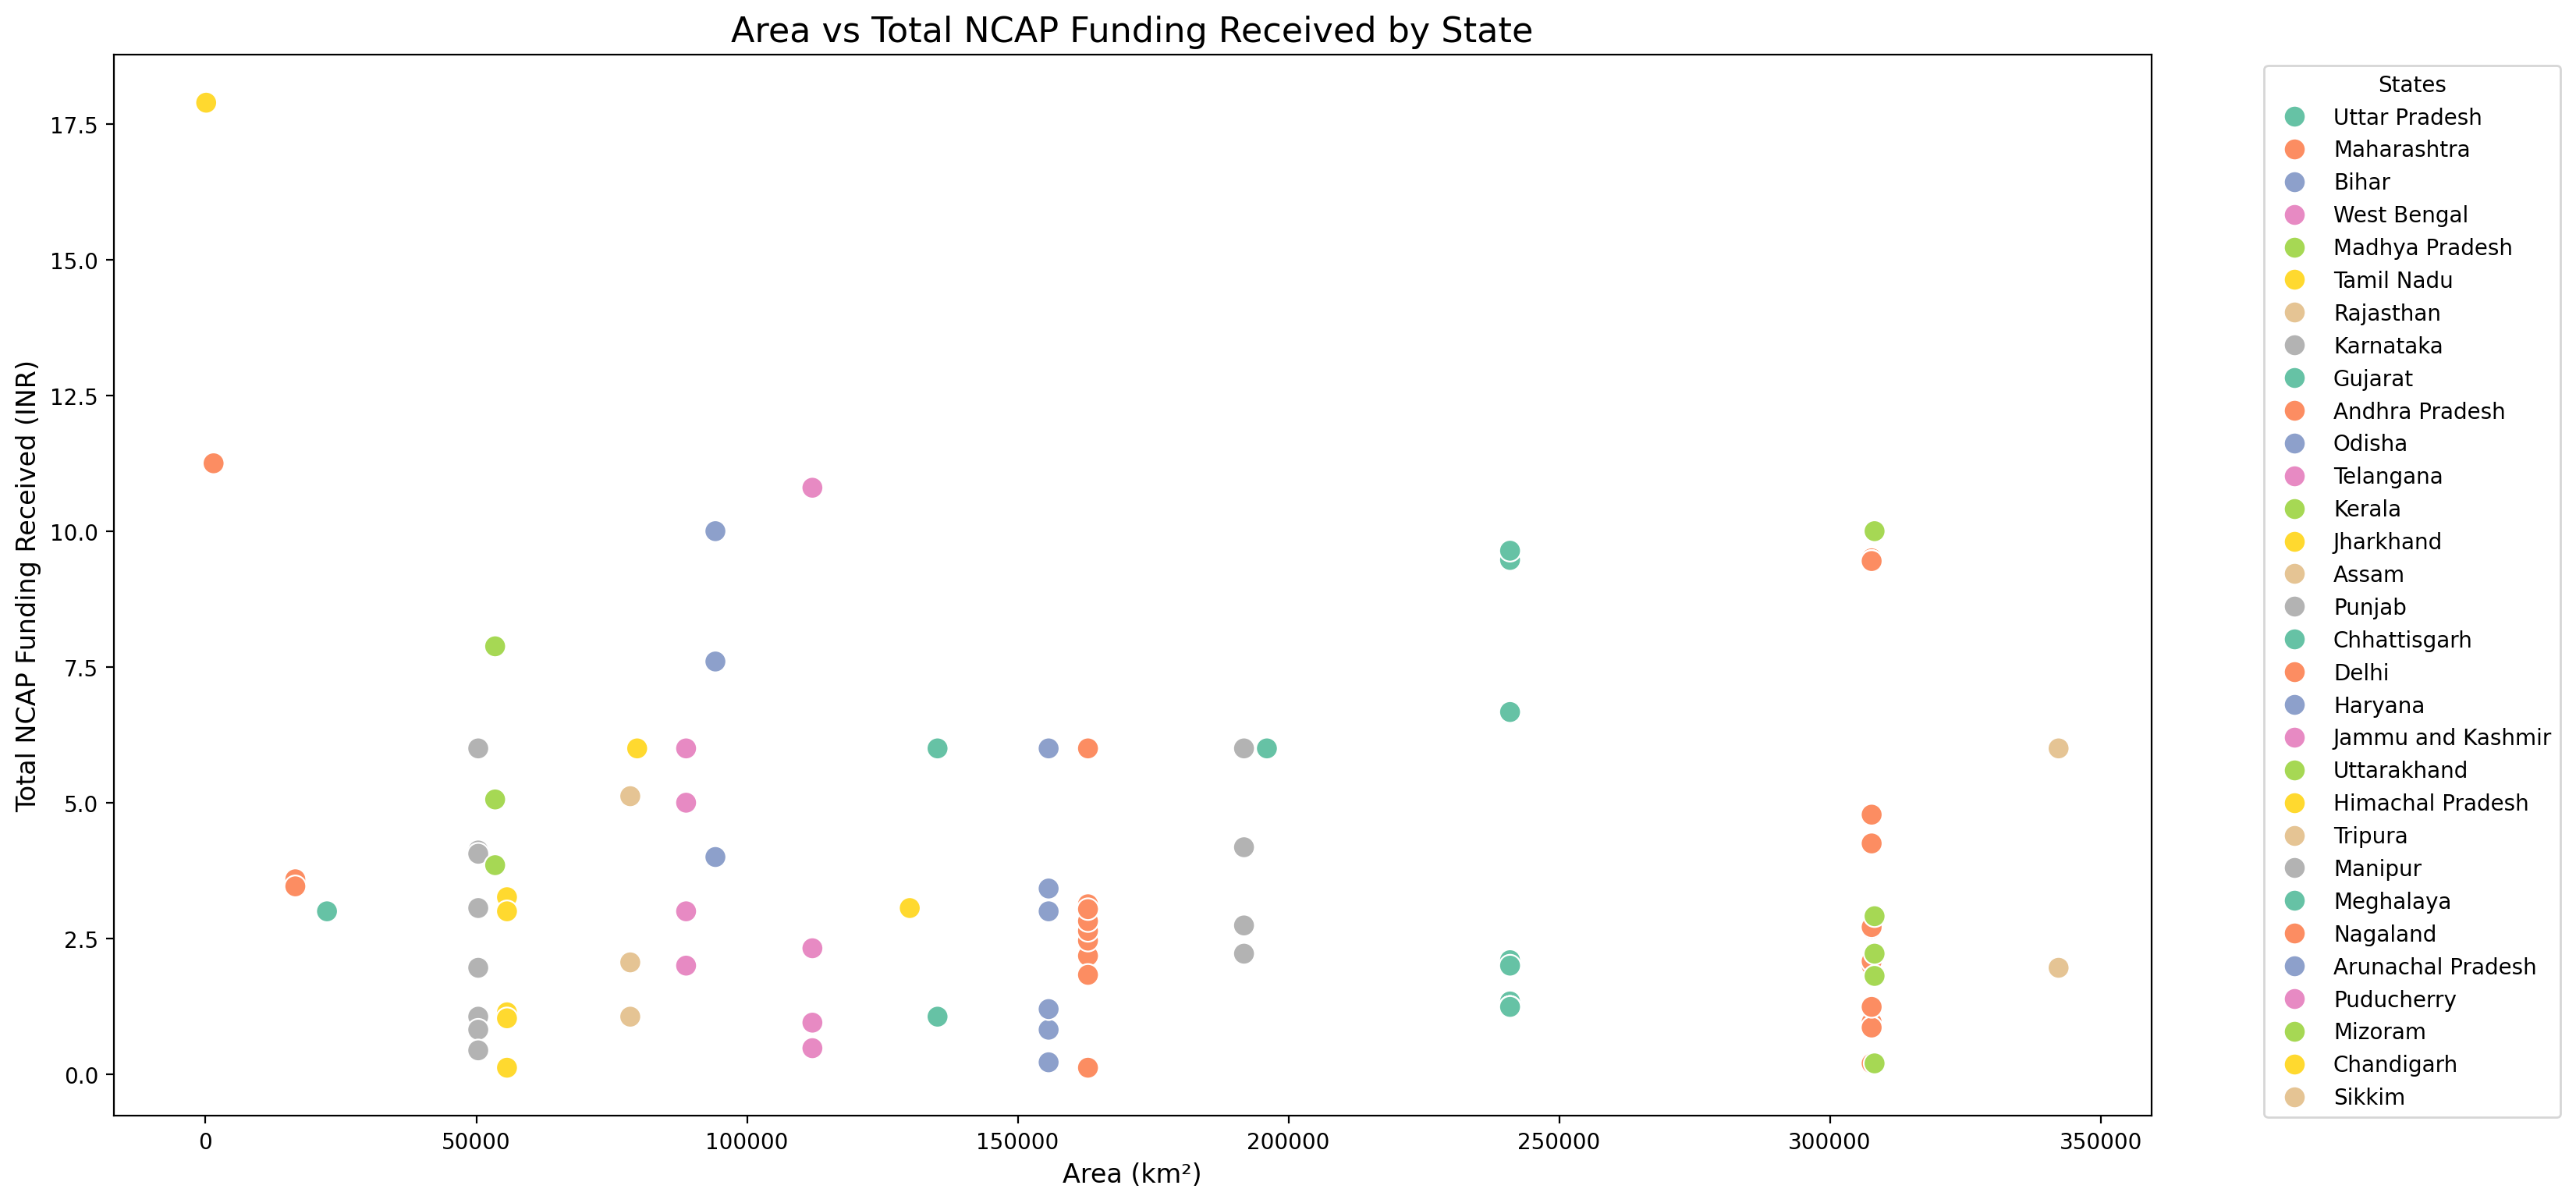

In [111]:
# Merge state_data with NCAP_Funding to get area and funding data
ncap_data.rename(columns={'State': 'state'}, inplace=True)
funding_area_data = state_data.merge(ncap_data[['state', 'Total fund released']], left_on='state', right_on='state', how='left')

# Create a scatter plot to show the relationship between area and funding
plt.figure(figsize=(14, 8))

# Use hue to color the points by state
sns.scatterplot(data=funding_area_data, x='Area (km2)', y='Total fund released', hue='state', palette='Set2', s=100)

# Add titles and labels
plt.title('Area vs Total NCAP Funding Received by State', fontsize=16)
plt.xlabel('Area (km²)', fontsize=12)
plt.ylabel('Total NCAP Funding Received (INR)', fontsize=12)
plt.tight_layout()

# Show the legend outside the plot
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


1.For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [112]:
#State-wise % change in PM2.5 (Summer vs Monsoon 2022)
df_2022 = df[df["Timestamp"].dt.year == 2022]
summer_avg = df_2022[df_2022["Timestamp"].dt.month.isin(seasons["Summer"])].groupby("state")["PM2.5"].mean()
monsoon_avg = df_2022[df_2022["Timestamp"].dt.month.isin(seasons["Monsoon"])].groupby("state")["PM2.5"].mean()
percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100

print("Percentage Change in PM2.5:")
print(percentage_change,"\n")              #negative sign indicates decrease in PM2.5 levels

most_diff_state = percentage_change.abs().idxmax()
print(f"State {most_diff_state} had the highest change in PM2.5 levels between Summer and Monsoon 2022 with {percentage_change[most_diff_state]:.2f}%")


Percentage Change in PM2.5:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         -53.496777
Name:

2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023.

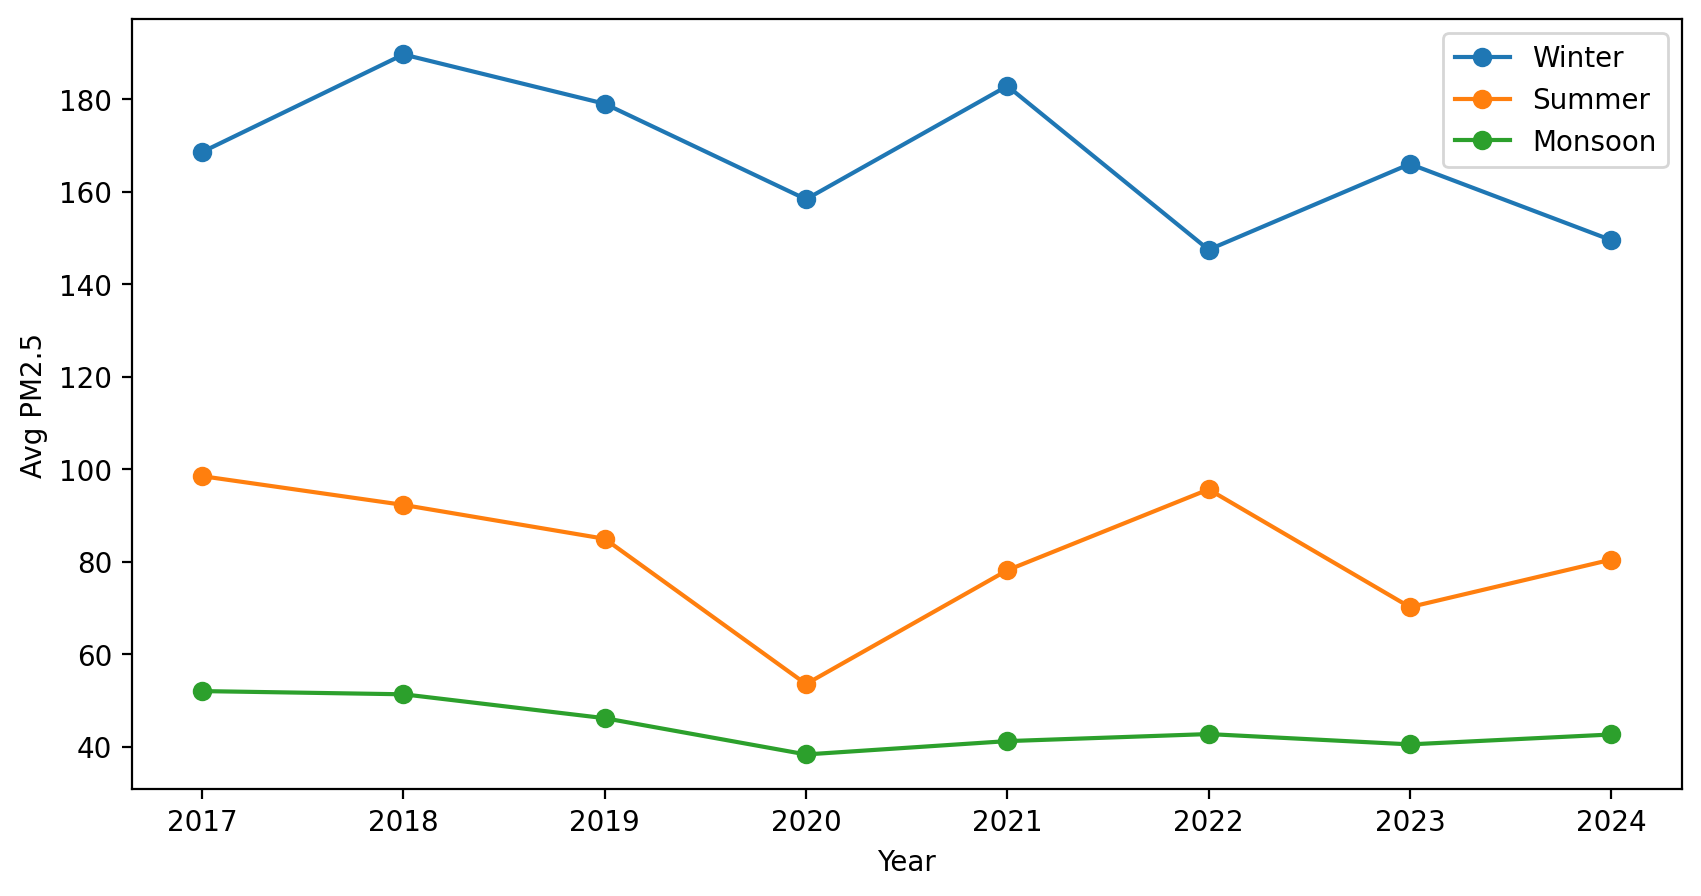

In [113]:
#Seasonal PM2.5 Trends in Delhi (2017-2023)
df_delhi = df[df["city"] == "Delhi"].copy()
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
seasonal_trends = {season: df_delhi[df_delhi["Timestamp"].dt.month.isin(months)].groupby("Year")["PM2.5"].mean() for season, months in seasons.items()}

plt.figure(figsize=(10, 5))
for season, trend in seasonal_trends.items():
    plt.plot(trend.index, trend.values, label=season, marker="o")
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

What seasonal variation, if any, can you observe in pollution levels?


From the analysis in pollution levels, it is evident that winter shows the highest pollution levels. The winter season consistently has the highest average PM2.5 values. This could be due to temperature inversion, where cold air traps pollutants near the ground, preventing dispersion. Monsoon season shows lowest pollution levels. The reason of decrease in pollution levels is due to rainfall washing away pollutants and improved air circulation. The level of pollution in summer is higher than monsoon but lower than winter. Increased dust and emissions contribute to moderate pollution, but higher temperatures allow better dispersion.

3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


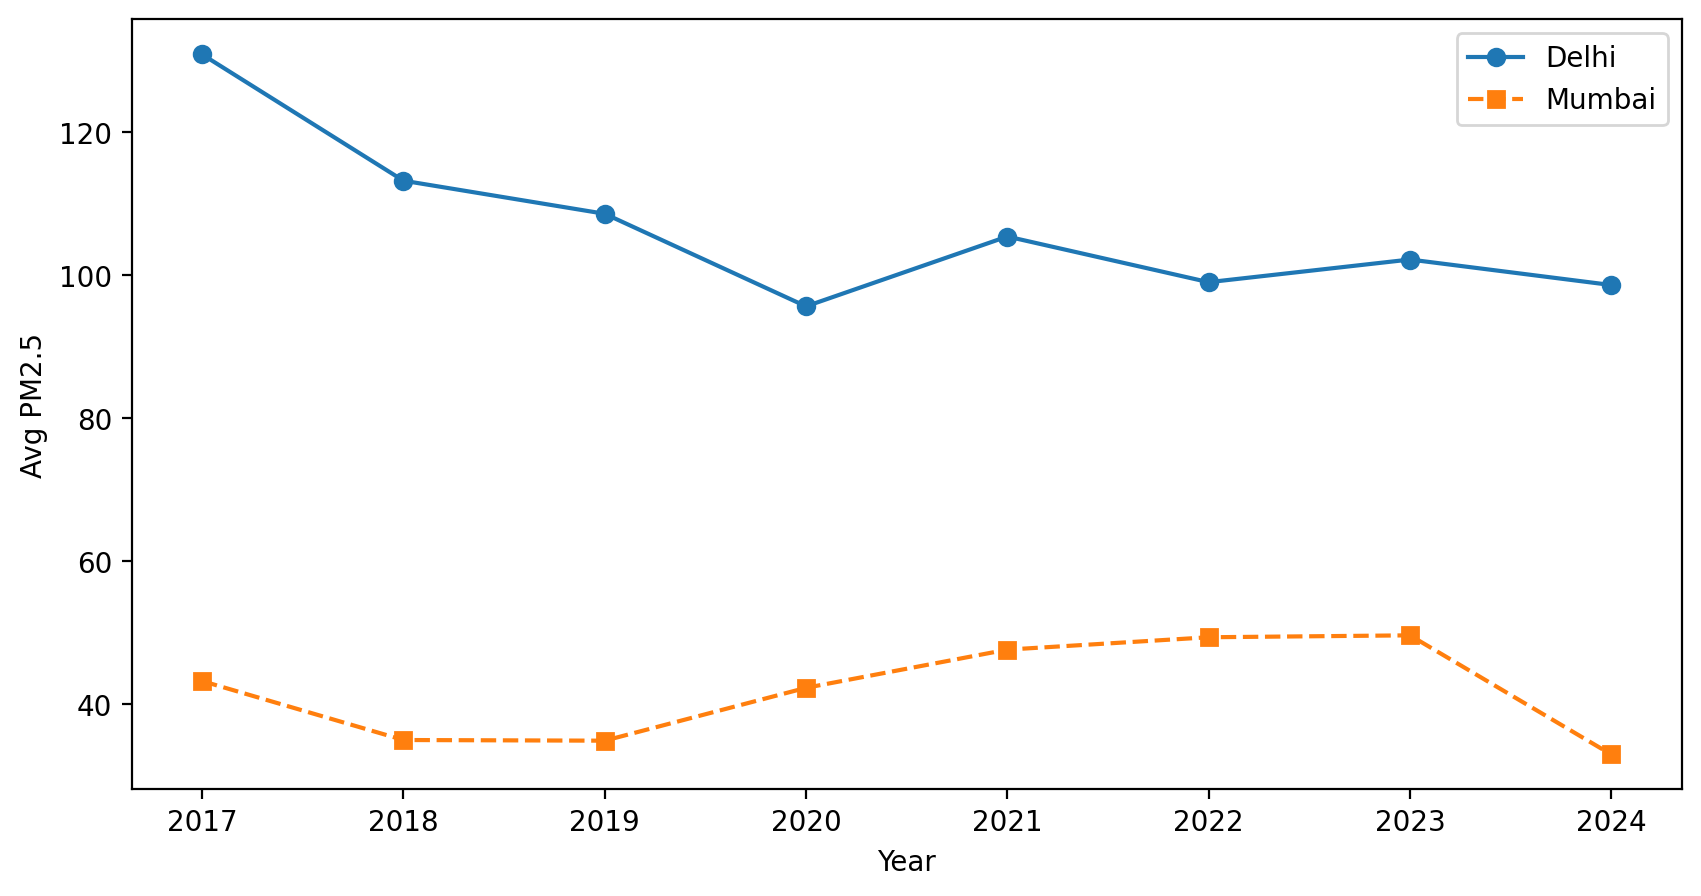

Fluctuation Levels: city
Delhi     0.074921
Mumbai    0.129768
dtype: float64


In [114]:
#Delhi vs Mumbai PM2.5 (2015-2023)
df_cities = df[df["city"].isin(["Delhi", "Mumbai"])].copy()
df_cities["Year"] = df_cities["Timestamp"].dt.year
city_avg = df_cities.groupby(["Year", "city"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(city_avg.index, city_avg["Delhi"], label="Delhi", marker="o")
plt.plot(city_avg.index, city_avg["Mumbai"], label="Mumbai", marker="s", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

delhi_mumbai_fluctuations = city_avg.pct_change().abs().mean()
print("Fluctuation Levels:", delhi_mumbai_fluctuations)

The fluctuation level of Mumbai is more. Therefore, Mumbai city had more fluctuations over the years.

# MISCELLANEOUS QUESTIONS


1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [115]:
data_2023 = data[(data["Timestamp"] >= "2023") & (data["Timestamp"] < "2024")]    #data for only year 2023
data_2023

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1229151,2023-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1229152,2023-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
1229153,2023-01-01,"Adarsh Nagar, Jaipur - RSPCB",52.502842,85.579053,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
1229154,2023-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
1229155,2023-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1433911,2023-12-31,"Worli, Mumbai - MPCB",47.100625,136.581481,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1433912,2023-12-31,"Yamunapuram, Bulandshahr - UPPCB",67.694737,127.273684,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1433913,2023-12-31,"Yerramukkapalli, Kadapa - APPCB",NaN,NaN,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1433914,2023-12-31,"Zero Point GICI, Gangtok - SSPCB",10.938437,25.018125,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [116]:
mean_pm2_bycity = data_2023.groupby("city")["PM2.5"].mean()    #mean PM2.5 levels for each city
print(f"City {mean_pm2_bycity.idxmax()} was the most polluted city in 2023 with average PM2.5 level of {mean_pm2_bycity.max()}")

City Darbhanga was the most polluted city in 2023 with average PM2.5 level of 242.91703203305738


In [117]:
pm2_darbhanga_2023 = data_2023[data_2023["city"] == "Darbhanga"]["PM2.5"]  #data in 2023 for 
hazardou_days_darbhanga = pm2_darbhanga_2023[pm2_darbhanga_2023 > 300]
percent_hazardous_days = (hazardou_days_darbhanga.count() / pm2_darbhanga_2023.count()) * 100

print(f"Most polluted city {mean_pm2_bycity.idxmax()} has {percent_hazardous_days} % of days with hazardous levels of PM2.5")

Most polluted city Darbhanga has 23.076923076923077 % of days with hazardous levels of PM2.5


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

In [118]:
data_2018_2020 = data[(data["Timestamp"] >= "2018") & (data["Timestamp"] < "2021")]
delhi_18_20 = data_2018_2020[data["state"] == "Delhi"]
delhi_18_20

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17860\287215523.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delhi_18_20 = data_2018_2020[data["state"] == "Delhi"]


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
204772,2018-01-01,"Alipur, Delhi - DPCC",NaN,NaN,Mahatma Gandhi Insititute for Combating Climat...,Delhi,28.815329,77.153010,Delhi
204775,2018-01-01,"Anand Vihar, Delhi - DPCC",481.625000,572.450000,NaN,Delhi,28.647622,77.315809,Delhi
204783,2018-01-01,"Ashok Vihar, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.695381,77.181665,Delhi
204785,2018-01-01,"Aya Nagar, Delhi - IMD",254.213165,424.537975,NaN,Delhi,28.470691,77.109936,Delhi
204800,2018-01-01,"Bawana, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.776200,77.051074,Delhi
...,...,...,...,...,...,...,...,...,...
819557,2020-12-31,"Sirifort, Delhi - CPCB",211.208791,317.729412,NaN,Delhi,28.550425,77.215938,Delhi
819562,2020-12-31,"Sonia Vihar, Delhi - DPCC",285.536842,404.778947,NaN,Delhi,28.710508,77.249485,Delhi
819563,2020-12-31,"Sri Aurobindo Marg, Delhi - DPCC",218.989583,252.604167,NaN,Delhi,28.531346,77.190156,Delhi
819612,2020-12-31,"Vivek Vihar, Delhi - DPCC",305.042105,416.895833,"Vivek Vihar, 110095",Delhi,28.672342,77.315260,Delhi


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17860\2540392769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_18_20["Timestamp"] = pd.to_datetime(delhi_18_20["Timestamp"])


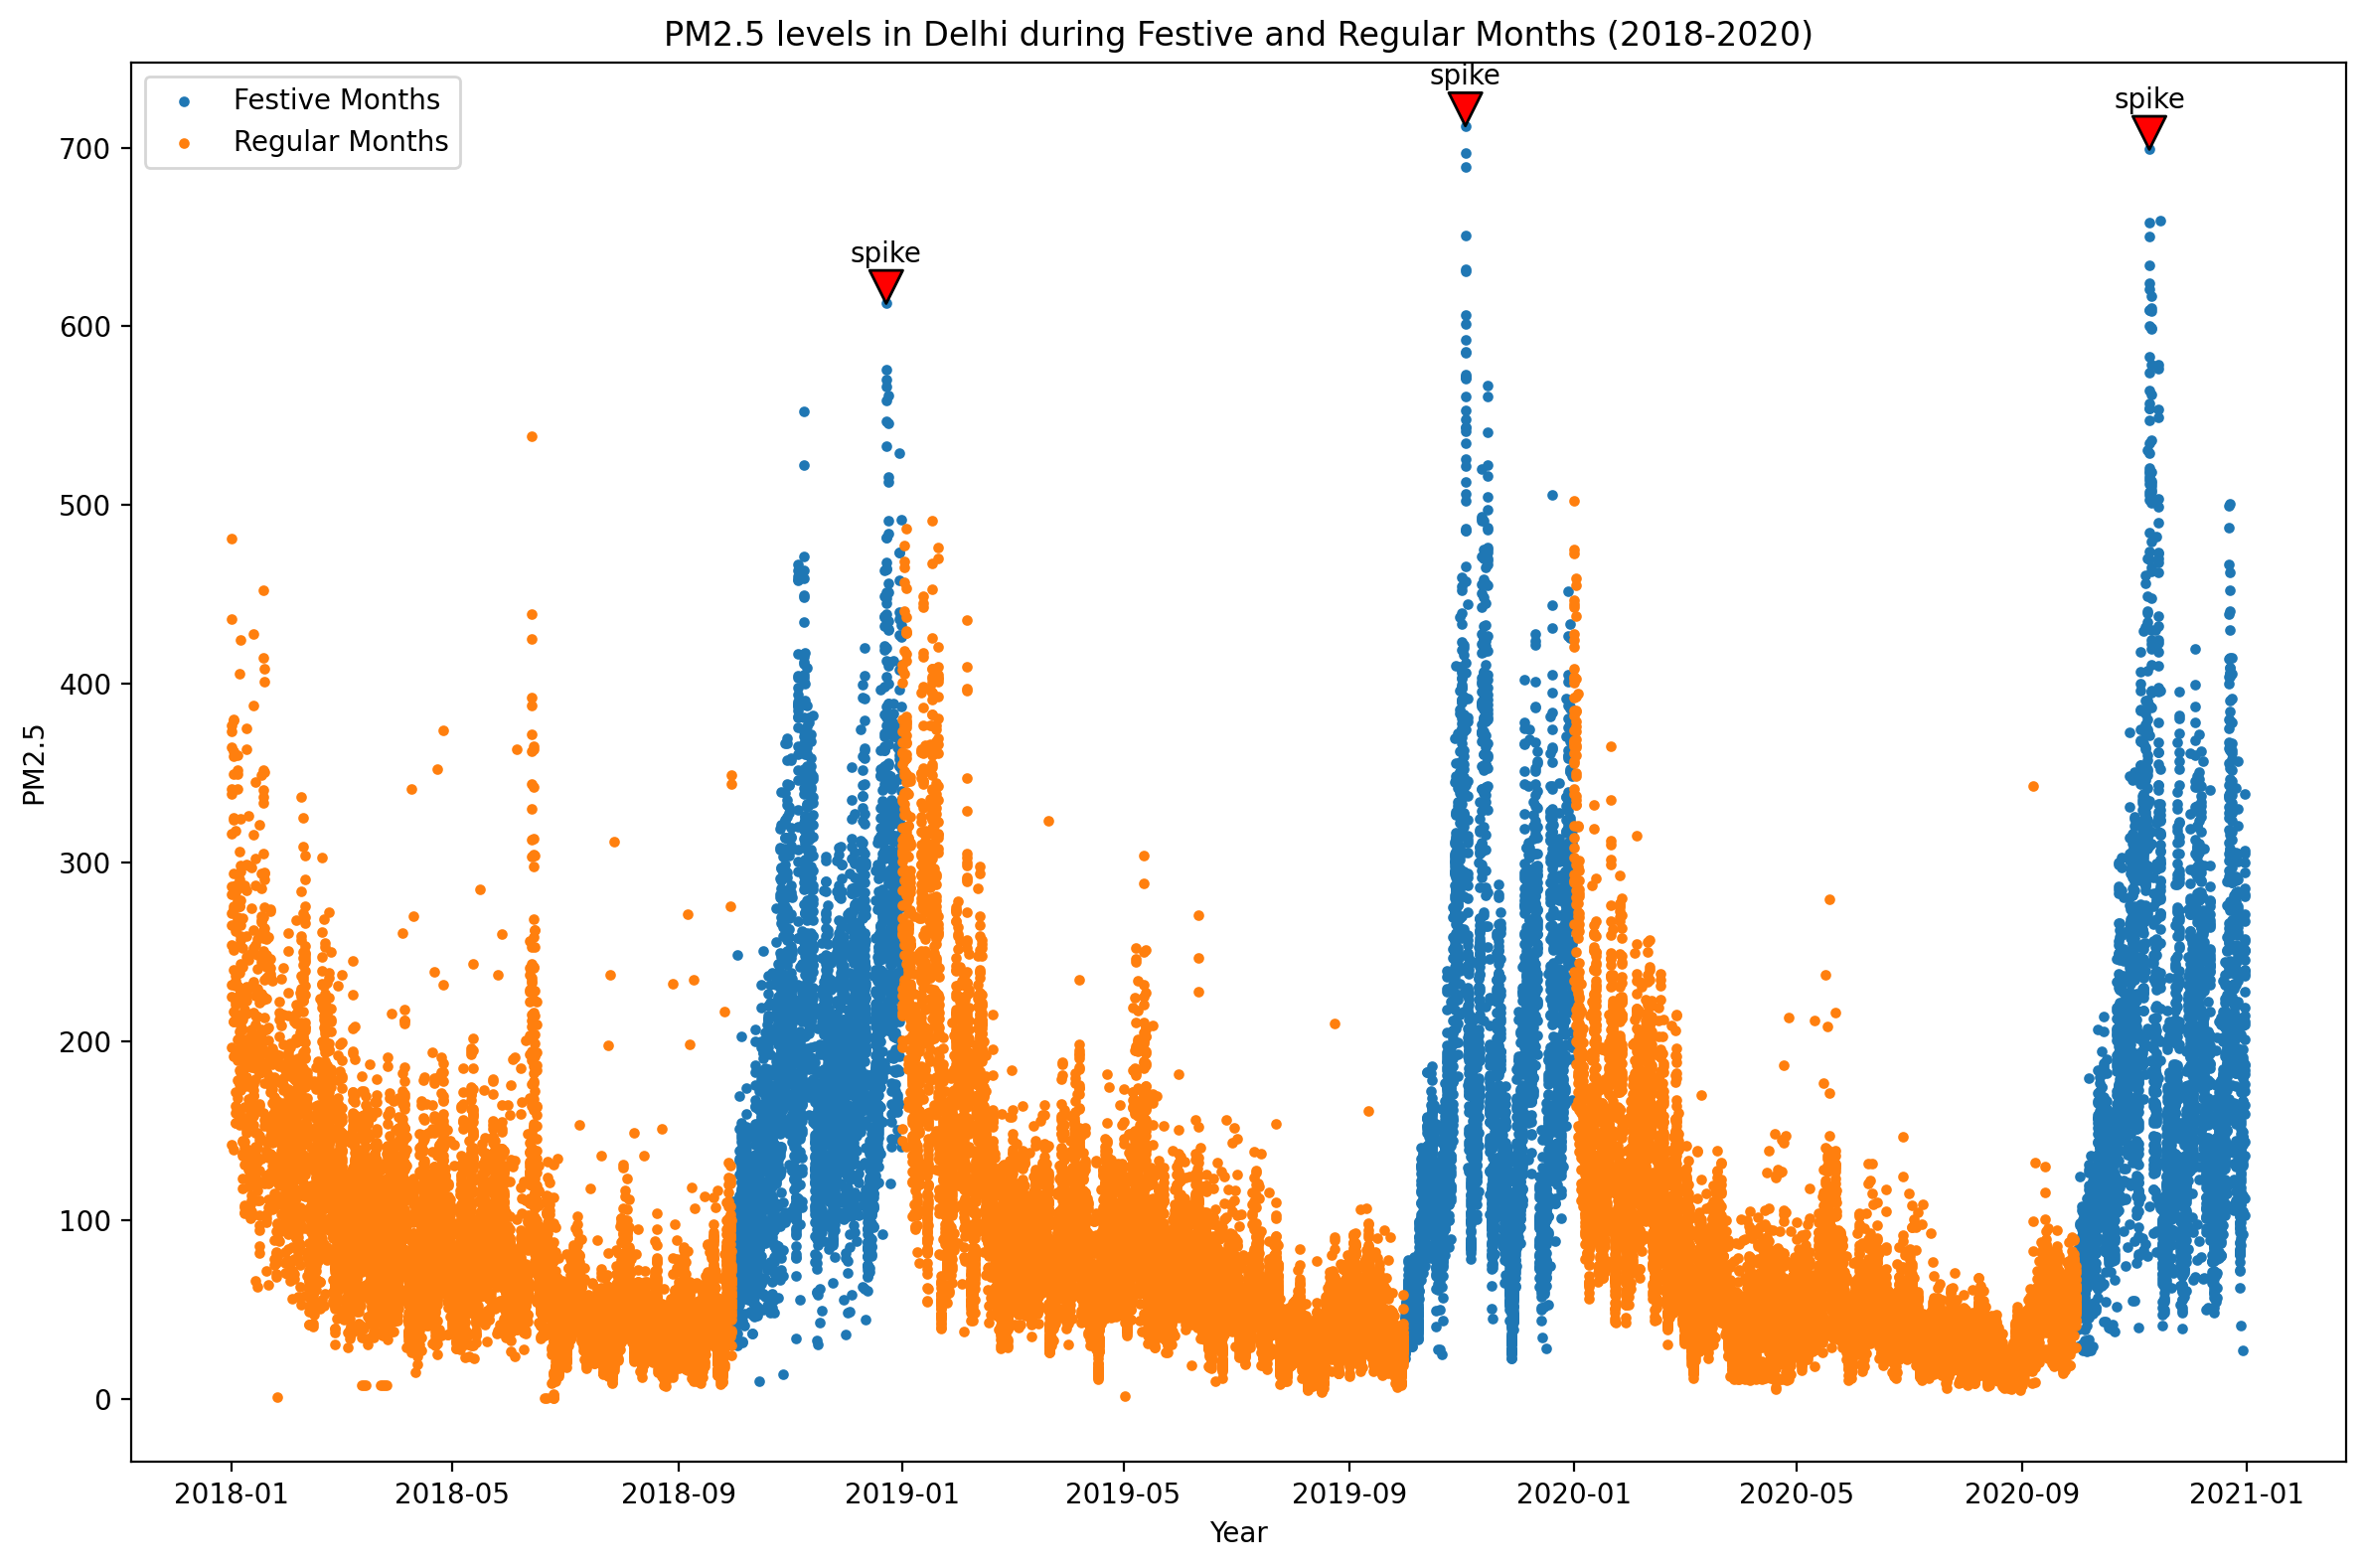

In [119]:
delhi_18_20["Timestamp"] = pd.to_datetime(delhi_18_20["Timestamp"])
delhi_festives = delhi_18_20[delhi_18_20["Timestamp"].dt.month.isin([10, 11, 12])]   #filtering festive months
delhi_regular = delhi_18_20[delhi_18_20["Timestamp"].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]    #filtering regular months

#plotting the data
plt.figure(figsize=(12, 8))
plt.scatter(delhi_festives["Timestamp"], delhi_festives["PM2.5"], label="Festive Months", s=8)
plt.scatter(delhi_regular["Timestamp"], delhi_regular["PM2.5"], label="Regular Months", s=8)
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.title("PM2.5 levels in Delhi during Festive and Regular Months (2018-2020)")
plt.legend()

#mark the spikes
for id_max in delhi_festives.groupby(delhi_festives["Timestamp"].dt.year)["PM2.5"].idxmax():
    plt.annotate(f"spike", (delhi_festives.loc[id_max, "Timestamp"], delhi_festives.loc[id_max, "PM2.5"]), textcoords="offset points", xytext=(0, 15), ha='center', arrowprops=dict(facecolor='red'))

plt.tight_layout()
plt.show()


3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

In [120]:
ncap_data.head()

,S. No.,state,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6.00,NaN,NaN,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,NaN,NaN,0.12,22.91


In [121]:
ncap_data['Amount released during FY 2020-21'] = pd.to_numeric(ncap_data['Amount released during FY 2020-21'], errors='coerce')

state_max_fund_2020 = ncap_data.groupby("state")["Amount released during FY 2020-21"].sum().idxmax()  #state with max fund in 2020
print(f"State {state_max_fund_2020} received the highest amount of funding in 2020-21")


State Andhra Pradesh received the highest amount of funding in 2020-21


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17860\3086498232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ap["Timestamp"] = pd.to_datetime(data_ap["Timestamp"])


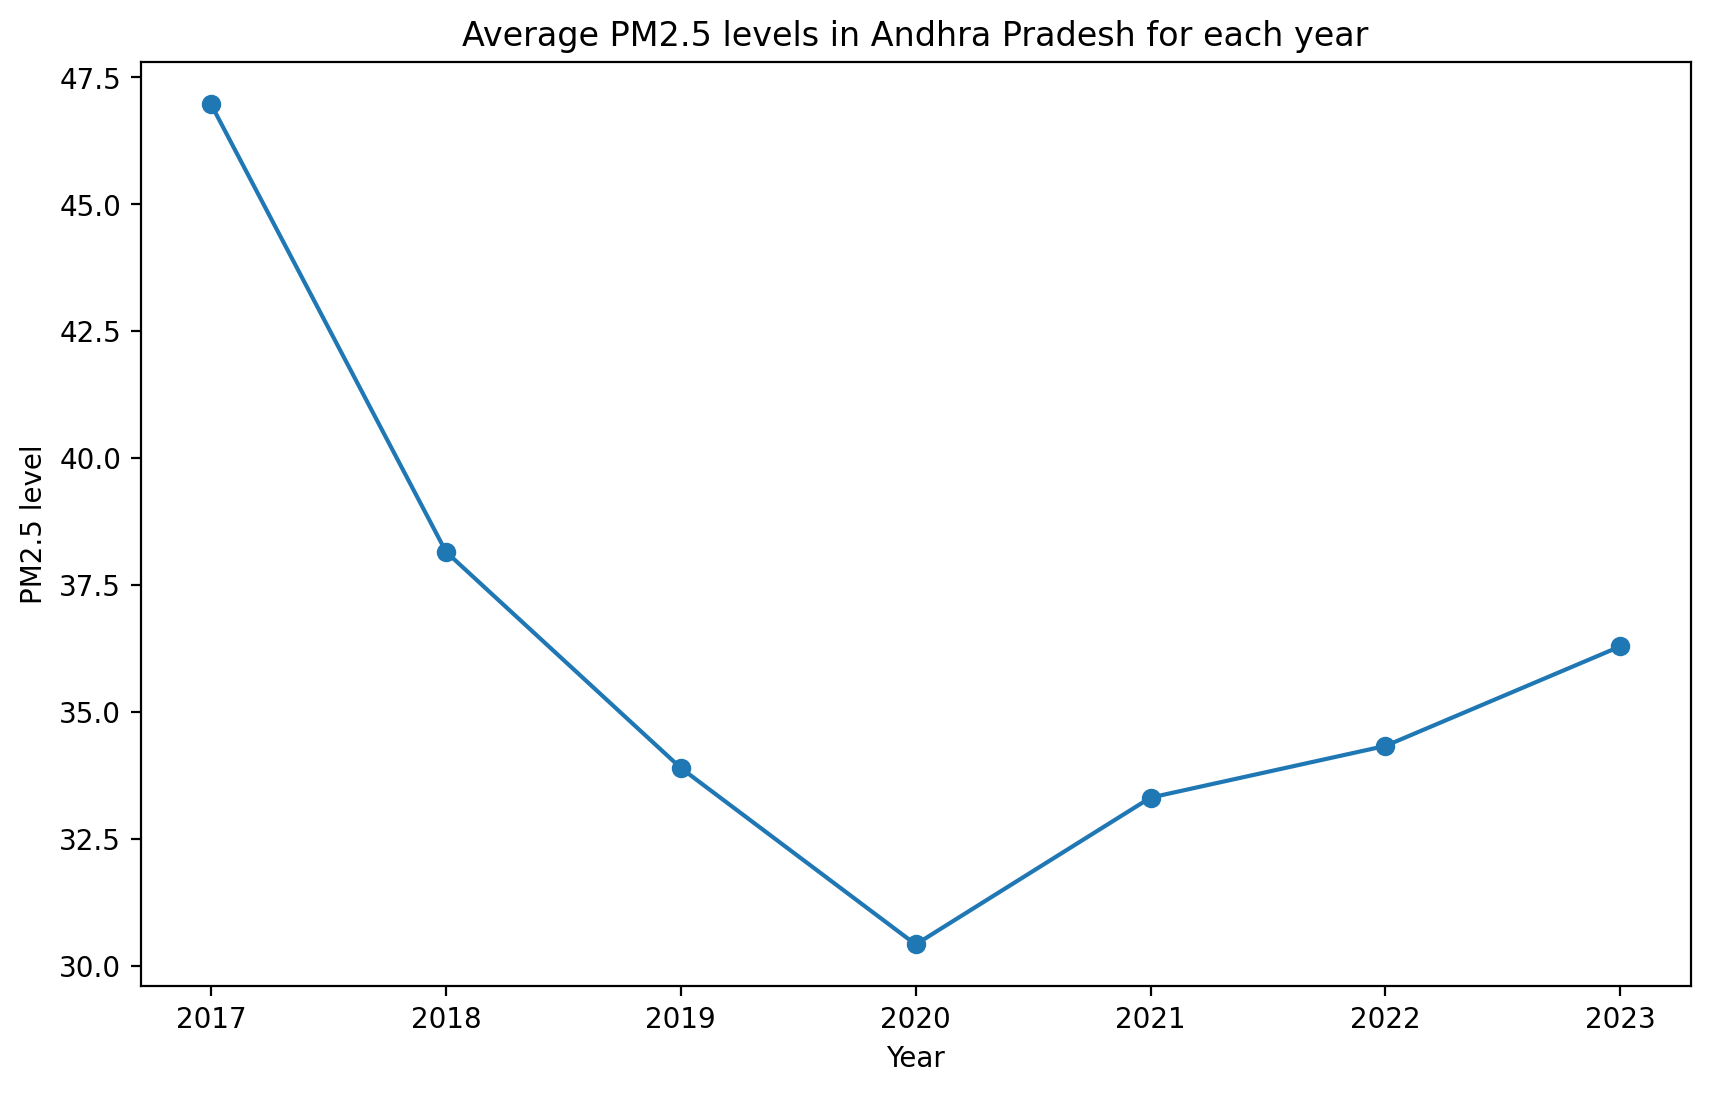

The average PM2.5 levels in Andhra Pradesh have been increasing since it received the highest funding in 2020-21
This increase suggests that the funding may not have been effective in reducing pollution levels in the state


In [122]:
data_ap = data[(data["state"] == "Andhra Pradesh") & (data["Timestamp"] < "2024")]
data_ap["Timestamp"] = pd.to_datetime(data_ap["Timestamp"])

yearly_avg_pm2 = data_ap.groupby(data_ap["Timestamp"].dt.year)["PM2.5"].mean()    #average PM2.5 levels for each year

#plotting average PM2.5 levels in Andhra Pradesh for each year
plt.figure(figsize=(10,6))
plt.plot(yearly_avg_pm2.index, yearly_avg_pm2.values, marker="o")
plt.xlabel("Year")
plt.ylabel("PM2.5 level")
plt.title("Average PM2.5 levels in Andhra Pradesh for each year")

plt.show()

print("The average PM2.5 levels in Andhra Pradesh have been increasing since it received the highest funding in 2020-21")
print("This increase suggests that the funding may not have been effective in reducing pollution levels in the state")


4. Draw the map of India and plot the sensor locations on the map.

In [123]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
%pip install geopandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17860\3659864376.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bystation = data_2023.groupby("station")["latitude", "longitude"].first()    #grouped data by monitoring station


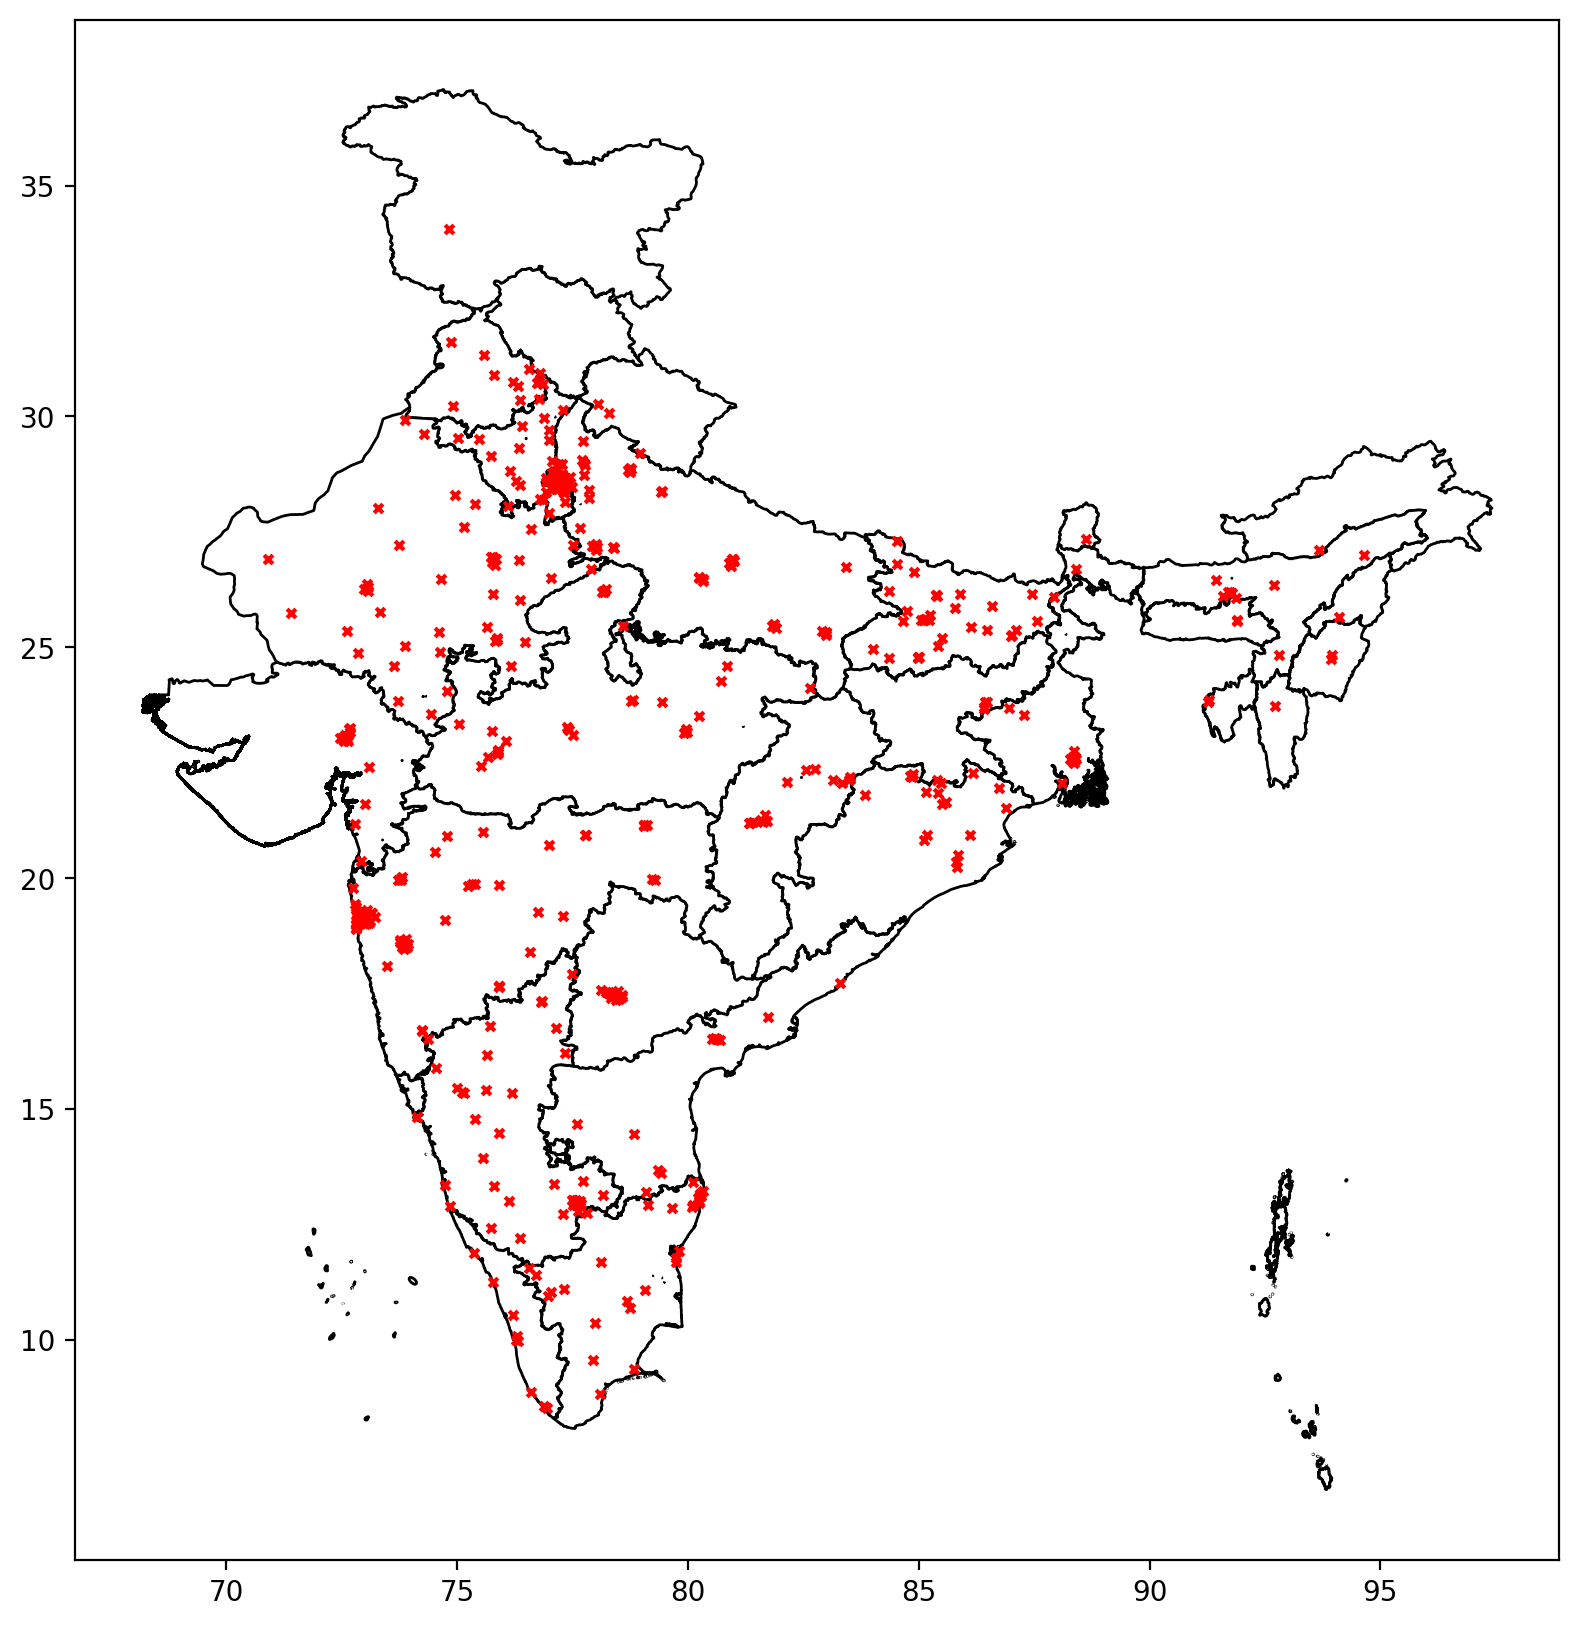

In [125]:
import geopandas as gpd

india = gpd.read_file("states_india.geojson")   #shapefile for India
data_bystation = data_2023.groupby("station")["latitude", "longitude"].first()    #grouped data by monitoring station


# creating a GeoDataFrame from the latitude and longitude columns of data_bystation
gdf_points = gpd.GeoDataFrame(data_bystation, geometry=gpd.points_from_xy(data_bystation.longitude, data_bystation.latitude))

# Plot the map of India
fig, ax = plt.subplots(figsize=(10, 10))
india.plot(ax=ax, color='white', edgecolor='black')

# Plot the points on the map
gdf_points.plot(ax=ax, color='red', markersize=10, marker='x')

plt.show()



In [126]:
#interactive map


import folium
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)    #map of India

data_bystation = data_2023.groupby("station")["latitude", "longitude"].first()    #grouped data by monitoring station

for lat, lon in zip(data_bystation["latitude"], data_bystation["longitude"]):
    if not (pd.isnull(lat) or pd.isnull(lon)):
        folium.Marker(location=[lat, lon]).add_to(map)   #adding markers for each monitoring station

map

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17860\605073520.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bystation = data_2023.groupby("station")["latitude", "longitude"].first()    #grouped data by monitoring station


# Tell us something new

There is so much to say:
1. Looking at the pollution levels between Mumbai and Delhi, we noticed how climatic conditions affect pollution levels too. Mumbai being a coastal city has way less air pollution compared to Delhi.
2. Lack of monitoring sites in Orissa, Chattisgarh and India's island states seems off.
3. Pollution levels are way higher in winters then in summers.